# 1. Import and Install Dependencies

In [1]:
!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib

ERROR: Could not find a version that satisfies the requirement tensorflow==2.4.1 (from versions: 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0, 2.15.1, 2.16.0rc0, 2.16.1)
ERROR: No matching distribution found for tensorflow==2.4.1


In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [3]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [5]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [6]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [7]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

KeyboardInterrupt: 

In [8]:
draw_landmarks(frame, results)

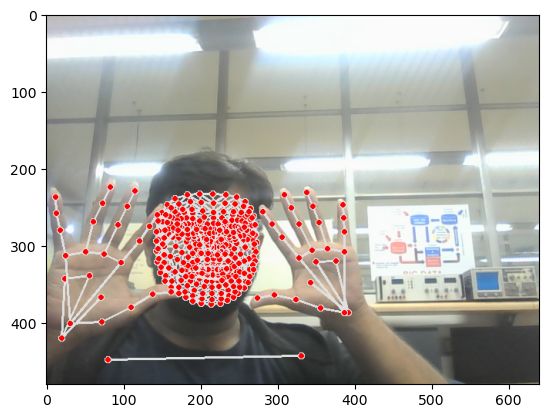

In [9]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [10]:
len(results.left_hand_landmarks.landmark)

21

In [11]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [12]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [13]:
if results.face_landmarks:
    # Extract facial landmarks and flatten the array
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten()
else:
    # If no facial landmarks are detected, create an array of zeros
    face = np.zeros(1404)  # Assuming 468 landmarks with 3 coordinates each (468 * 3 = 1404)

# Print the flattened array of facial landmarks
print(face)

[ 0.33979204  0.67906684 -0.027554   ...  0.40158957  0.57585615
  0.02522503]


In [14]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [15]:
result_test = extract_keypoints(results)

In [16]:
result_test

array([ 0.32823285,  0.6467759 , -1.11527109, ...,  0.0190615 ,
        0.49445695, -0.06782483])

In [17]:
np.save('0', result_test)

In [18]:
np.load('0.npy')

array([ 0.32823285,  0.6467759 , -1.11527109, ...,  0.0190615 ,
        0.49445695, -0.06782483])

# 4. Setup Folders for Collection

In [24]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['Pen in Hand', 'No Pen in Hand', 'Thumb Clicked Pen', 'Thumb Unclicked Pen', 'Finger Clicked Pen', 'Finger Unclicked Pen' ])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 30

In [27]:
for action in actions: 
    #dirmax = np.max(np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int))
    for sequence in range(1,no_sequences+1):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(dirmax+sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [28]:
import cv2
import os
import numpy as np

# Function to create directories if they don't exist
def create_directories(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)

cap = cv2.VideoCapture(0)

# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(start_folder, start_folder+no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                
                # Create directories if they don't exist
                action_dir = os.path.join(DATA_PATH, action)
                sequence_dir = os.path.join(action_dir, str(sequence))
                create_directories(sequence_dir)
                
                npy_path = os.path.join(sequence_dir, str(frame_num) + '.npy')
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
cap.release()
cv2.destroyAllWindows()


In [29]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [30]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [31]:
label_map = {label:num for num, label in enumerate(actions)}

In [32]:
label_map

{'Pen in Hand': 0,
 'No Pen in Hand': 1,
 'Thumb Clicked Pen': 2,
 'Thumb Unclicked Pen': 3,
 'Finger Clicked Pen': 4,
 'Finger Unclicked Pen': 5}

In [33]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [34]:
np.array(sequences).shape

(180, 30, 1662)

In [35]:
np.array(labels).shape

(180,)

In [36]:
X = np.array(sequences)

In [37]:
X.shape

(180, 30, 1662)

In [38]:
y = to_categorical(labels).astype(int)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [40]:
y_test.shape

(9, 6)

# 7. Build and Train LSTM Neural Network

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [42]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [43]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

C:\Users\BHARGAV\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [71]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [72]:
model.fit(X_train, y_train, epochs=10000, callbacks=[tb_callback])

Epoch 1/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - categorical_accuracy: 0.1624 - loss: 1.7913
Epoch 2/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1605 - loss: 1.7921
Epoch 3/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1661 - loss: 1.7924
Epoch 4/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1772 - loss: 1.7924
Epoch 5/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.2059 - loss: 1.7899
Epoch 6/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1719 - loss: 1.7923
Epoch 7/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1876 - loss: 1.7908
Epoch 8/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1867 - loss: 1.7892
Epoch 9/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1577 - loss: 1.7923
Epoch 10/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1992 - loss: 1.7896
Epoch 11/10000
6/6 

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1746 - loss: 1.7911
Epoch 63/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - categorical_accuracy: 0.1640 - loss: 1.7913
Epoch 64/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1855 - loss: 1.7913
Epoch 65/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1756 - loss: 1.7929
Epoch 66/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1762 - loss: 1.7919
Epoch 67/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1819 - loss: 1.7907
Epoch 68/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1407 - loss: 1.7931
Epoch 69/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1643 - loss: 1.7907
Epoch 70/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1893 - loss: 1.7912
Epoch 71/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - categorical_accuracy: 0.1952 - loss: 1.7902
Epoch 72/10000
6/6 ━━━━━━

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1833 - loss: 1.7929
Epoch 124/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1797 - loss: 1.7910
Epoch 125/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1936 - loss: 1.7904
Epoch 126/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1678 - loss: 1.7906
Epoch 127/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1980 - loss: 1.7892
Epoch 128/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1527 - loss: 1.7939
Epoch 129/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1387 - loss: 1.7948
Epoch 130/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1547 - loss: 1.7928
Epoch 131/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1666 - loss: 1.7911
Epoch 132/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1626 - loss: 1.7924
Epoch 133/10000


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1628 - loss: 1.7921
Epoch 185/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1881 - loss: 1.7912
Epoch 186/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.2044 - loss: 1.7890
Epoch 187/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1689 - loss: 1.7906
Epoch 188/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1749 - loss: 1.7900
Epoch 189/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1841 - loss: 1.7898
Epoch 190/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - categorical_accuracy: 0.2042 - loss: 1.7884
Epoch 191/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1971 - loss: 1.7894
Epoch 192/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1770 - loss: 1.7925
Epoch 193/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1518 - loss: 1.7907
Epoch 194/10000


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1707 - loss: 1.7898
Epoch 246/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1594 - loss: 1.7920
Epoch 247/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1885 - loss: 1.7927
Epoch 248/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1715 - loss: 1.7926
Epoch 249/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1817 - loss: 1.7916
Epoch 250/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1668 - loss: 1.7930
Epoch 251/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1720 - loss: 1.7918
Epoch 252/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1630 - loss: 1.7910
Epoch 253/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1583 - loss: 1.7907
Epoch 254/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1808 - loss: 1.7904
Epoch 255/10000


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1890 - loss: 1.7909
Epoch 307/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.2031 - loss: 1.7898
Epoch 308/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1678 - loss: 1.7905
Epoch 309/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1566 - loss: 1.7920
Epoch 310/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1826 - loss: 1.7915
Epoch 311/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1439 - loss: 1.7924
Epoch 312/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1715 - loss: 1.7904
Epoch 313/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1968 - loss: 1.7885
Epoch 314/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.2190 - loss: 1.7874
Epoch 315/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.2057 - loss: 1.7891
Epoch 316/10000


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1791 - loss: 1.7922
Epoch 368/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - categorical_accuracy: 0.1445 - loss: 1.7920
Epoch 369/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.2172 - loss: 1.7889
Epoch 370/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1477 - loss: 1.7942
Epoch 371/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1689 - loss: 1.7907
Epoch 372/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1618 - loss: 1.7925
Epoch 373/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1547 - loss: 1.7932
Epoch 374/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1893 - loss: 1.7915
Epoch 375/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1403 - loss: 1.7924
Epoch 376/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1790 - loss: 1.7915
Epoch 377/10000


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1611 - loss: 1.7915
Epoch 429/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1542 - loss: 1.7910
Epoch 430/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1723 - loss: 1.7898
Epoch 431/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1672 - loss: 1.7915
Epoch 432/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.2137 - loss: 1.7890
Epoch 433/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1751 - loss: 1.7923
Epoch 434/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1785 - loss: 1.7932
Epoch 435/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1904 - loss: 1.7906
Epoch 436/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - categorical_accuracy: 0.1960 - loss: 1.7915
Epoch 437/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1753 - loss: 1.7908
Epoch 438/10000


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1733 - loss: 1.7923
Epoch 490/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1851 - loss: 1.7900
Epoch 491/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1692 - loss: 1.7920
Epoch 492/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1893 - loss: 1.7933
Epoch 493/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1644 - loss: 1.7912
Epoch 494/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1797 - loss: 1.7902
Epoch 495/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1848 - loss: 1.7930
Epoch 496/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1814 - loss: 1.7905
Epoch 497/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1947 - loss: 1.7871
Epoch 498/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1756 - loss: 1.7906
Epoch 499/10000


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1597 - loss: 1.7928
Epoch 551/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1809 - loss: 1.7884
Epoch 552/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1865 - loss: 1.7897
Epoch 553/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1671 - loss: 1.7913
Epoch 554/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1659 - loss: 1.7918
Epoch 555/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.2077 - loss: 1.7901
Epoch 556/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1716 - loss: 1.7907
Epoch 557/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1759 - loss: 1.7900
Epoch 558/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1633 - loss: 1.7896
Epoch 559/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1812 - loss: 1.7913
Epoch 560/10000


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1741 - loss: 1.7914
Epoch 612/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1922 - loss: 1.7912
Epoch 613/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.2248 - loss: 1.7893
Epoch 614/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1455 - loss: 1.7936
Epoch 615/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1772 - loss: 1.7916
Epoch 616/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1812 - loss: 1.7907
Epoch 617/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1742 - loss: 1.7919
Epoch 618/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1663 - loss: 1.7894
Epoch 619/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1780 - loss: 1.7911
Epoch 620/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1788 - loss: 1.7916
Epoch 621/10000


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1954 - loss: 1.7900
Epoch 673/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1578 - loss: 1.7934
Epoch 674/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1663 - loss: 1.7914
Epoch 675/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1888 - loss: 1.7905
Epoch 676/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1876 - loss: 1.7905
Epoch 677/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1475 - loss: 1.7920
Epoch 678/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - categorical_accuracy: 0.1480 - loss: 1.7925
Epoch 679/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - categorical_accuracy: 0.1921 - loss: 1.7887
Epoch 680/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1627 - loss: 1.7917
Epoch 681/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1628 - loss: 1.7913
Epoch 682/10000


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1873 - loss: 1.7902
Epoch 734/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1629 - loss: 1.7919
Epoch 735/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1853 - loss: 1.7917
Epoch 736/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1891 - loss: 1.7906
Epoch 737/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1905 - loss: 1.7900
Epoch 738/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1860 - loss: 1.7916
Epoch 739/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1820 - loss: 1.7902
Epoch 740/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1632 - loss: 1.7909
Epoch 741/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1687 - loss: 1.7918
Epoch 742/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1578 - loss: 1.7914
Epoch 743/10000


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1629 - loss: 1.7921
Epoch 795/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1607 - loss: 1.7913
Epoch 796/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1808 - loss: 1.7919
Epoch 797/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1830 - loss: 1.7924
Epoch 798/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1716 - loss: 1.7899
Epoch 799/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1696 - loss: 1.7913
Epoch 800/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1981 - loss: 1.7897
Epoch 801/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - categorical_accuracy: 0.1854 - loss: 1.7915
Epoch 802/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1638 - loss: 1.7909
Epoch 803/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - categorical_accuracy: 0.1741 - loss: 1.7894
Epoch 804/10000


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - categorical_accuracy: 0.1454 - loss: 1.7925
Epoch 856/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - categorical_accuracy: 0.1937 - loss: 1.7902
Epoch 857/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1902 - loss: 1.7911
Epoch 858/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1865 - loss: 1.7888
Epoch 859/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1923 - loss: 1.7910
Epoch 860/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1777 - loss: 1.7916
Epoch 861/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.2015 - loss: 1.7909
Epoch 862/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1745 - loss: 1.7909
Epoch 863/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1821 - loss: 1.7905
Epoch 864/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1602 - loss: 1.7936
Epoch 865/10000


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - categorical_accuracy: 0.1567 - loss: 1.7924
Epoch 917/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1960 - loss: 1.7906
Epoch 918/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1893 - loss: 1.7906
Epoch 919/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1726 - loss: 1.7917
Epoch 920/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1806 - loss: 1.7903
Epoch 921/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1652 - loss: 1.7914
Epoch 922/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1856 - loss: 1.7908
Epoch 923/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1464 - loss: 1.7933
Epoch 924/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1732 - loss: 1.7882
Epoch 925/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1897 - loss: 1.7912
Epoch 926/10000


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1689 - loss: 1.7911
Epoch 978/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - categorical_accuracy: 0.1860 - loss: 1.7898
Epoch 979/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1994 - loss: 1.7906
Epoch 980/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1596 - loss: 1.7934
Epoch 981/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.2166 - loss: 1.7893
Epoch 982/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1943 - loss: 1.7917
Epoch 983/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1527 - loss: 1.7917
Epoch 984/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1681 - loss: 1.7908
Epoch 985/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1466 - loss: 1.7923
Epoch 986/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.2072 - loss: 1.7900
Epoch 987/10000


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1518 - loss: 1.7929
Epoch 1038/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1692 - loss: 1.7917
Epoch 1039/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1967 - loss: 1.7903
Epoch 1040/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1859 - loss: 1.7901
Epoch 1041/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1891 - loss: 1.7916
Epoch 1042/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1516 - loss: 1.7918
Epoch 1043/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.2099 - loss: 1.7878
Epoch 1044/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1765 - loss: 1.7903
Epoch 1045/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.2105 - loss: 1.7890
Epoch 1046/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - categorical_accuracy: 0.1612 - loss: 1.7924
Epoch 1

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1717 - loss: 1.7922
Epoch 1098/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1577 - loss: 1.7940
Epoch 1099/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1994 - loss: 1.7901
Epoch 1100/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1913 - loss: 1.7914
Epoch 1101/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.2148 - loss: 1.7887
Epoch 1102/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.2029 - loss: 1.7876
Epoch 1103/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1739 - loss: 1.7907
Epoch 1104/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1739 - loss: 1.7891
Epoch 1105/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1488 - loss: 1.7948
Epoch 1106/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - categorical_accuracy: 0.1706 - loss: 1.7898
Epoch 1

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1623 - loss: 1.7912
Epoch 1158/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.2014 - loss: 1.7898
Epoch 1159/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1561 - loss: 1.7907
Epoch 1160/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1851 - loss: 1.7905
Epoch 1161/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1781 - loss: 1.7917
Epoch 1162/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1748 - loss: 1.7913
Epoch 1163/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1938 - loss: 1.7912
Epoch 1164/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1752 - loss: 1.7913
Epoch 1165/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1858 - loss: 1.7905
Epoch 1166/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1934 - loss: 1.7909
Epoch 1

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1771 - loss: 1.7903
Epoch 1218/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1582 - loss: 1.7936
Epoch 1219/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1803 - loss: 1.7898
Epoch 1220/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1759 - loss: 1.7912
Epoch 1221/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1742 - loss: 1.7927
Epoch 1222/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1803 - loss: 1.7884
Epoch 1223/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1914 - loss: 1.7902
Epoch 1224/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1824 - loss: 1.7920
Epoch 1225/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1787 - loss: 1.7910
Epoch 1226/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1760 - loss: 1.7908
Epoch 1

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1631 - loss: 1.7927
Epoch 1278/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1546 - loss: 1.7921
Epoch 1279/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1791 - loss: 1.7905
Epoch 1280/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - categorical_accuracy: 0.1690 - loss: 1.7923
Epoch 1281/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1634 - loss: 1.7923
Epoch 1282/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1844 - loss: 1.7927
Epoch 1283/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.2158 - loss: 1.7886
Epoch 1284/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1464 - loss: 1.7922
Epoch 1285/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1768 - loss: 1.7898
Epoch 1286/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1804 - loss: 1.7914
Epoch 1

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1736 - loss: 1.7903
Epoch 1338/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - categorical_accuracy: 0.1726 - loss: 1.7910
Epoch 1339/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1626 - loss: 1.7912
Epoch 1340/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1948 - loss: 1.7910
Epoch 1341/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.2102 - loss: 1.7888
Epoch 1342/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1921 - loss: 1.7903
Epoch 1343/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1843 - loss: 1.7913
Epoch 1344/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1314 - loss: 1.7914
Epoch 1345/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1759 - loss: 1.7907
Epoch 1346/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1869 - loss: 1.7919
Epoch 1

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1597 - loss: 1.7916
Epoch 1398/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1759 - loss: 1.7909
Epoch 1399/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1837 - loss: 1.7904
Epoch 1400/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1544 - loss: 1.7920
Epoch 1401/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1774 - loss: 1.7902
Epoch 1402/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1639 - loss: 1.7921
Epoch 1403/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1454 - loss: 1.7930
Epoch 1404/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1370 - loss: 1.7919
Epoch 1405/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1594 - loss: 1.7924
Epoch 1406/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1897 - loss: 1.7904
Epoch 1

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - categorical_accuracy: 0.1500 - loss: 1.7914
Epoch 1458/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - categorical_accuracy: 0.1782 - loss: 1.7918
Epoch 1459/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - categorical_accuracy: 0.1669 - loss: 1.7919
Epoch 1460/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - categorical_accuracy: 0.1994 - loss: 1.7901
Epoch 1461/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - categorical_accuracy: 0.1681 - loss: 1.7921
Epoch 1462/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - categorical_accuracy: 0.1663 - loss: 1.7934
Epoch 1463/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - categorical_accuracy: 0.1516 - loss: 1.7904
Epoch 1464/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - categorical_accuracy: 0.1700 - loss: 1.7925
Epoch 1465/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1817 - loss: 1.7921
Epoch 1466/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - categorical_accuracy: 0.1713 - loss: 1.7908
Epoch 1

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1668 - loss: 1.7927
Epoch 1518/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - categorical_accuracy: 0.1817 - loss: 1.7915
Epoch 1519/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1684 - loss: 1.7929
Epoch 1520/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1814 - loss: 1.7912
Epoch 1521/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1767 - loss: 1.7916
Epoch 1522/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1378 - loss: 1.7942
Epoch 1523/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.2003 - loss: 1.7890
Epoch 1524/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1707 - loss: 1.7902
Epoch 1525/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1608 - loss: 1.7939
Epoch 1526/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1515 - loss: 1.7930
Epoch 1

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.2036 - loss: 1.7895
Epoch 1578/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1684 - loss: 1.7930
Epoch 1579/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1592 - loss: 1.7914
Epoch 1580/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1797 - loss: 1.7905
Epoch 1581/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.2109 - loss: 1.7907
Epoch 1582/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1832 - loss: 1.7913
Epoch 1583/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1826 - loss: 1.7902
Epoch 1584/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1711 - loss: 1.7933
Epoch 1585/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1649 - loss: 1.7938
Epoch 1586/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1763 - loss: 1.7903
Epoch 1

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1807 - loss: 1.7910
Epoch 1638/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1745 - loss: 1.7927
Epoch 1639/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1527 - loss: 1.7943
Epoch 1640/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1728 - loss: 1.7916
Epoch 1641/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1809 - loss: 1.7895
Epoch 1642/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - categorical_accuracy: 0.1841 - loss: 1.7914
Epoch 1643/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1707 - loss: 1.7918
Epoch 1644/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - categorical_accuracy: 0.1817 - loss: 1.7922
Epoch 1645/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1962 - loss: 1.7878
Epoch 1646/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1732 - loss: 1.7917
Epoch 1

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1815 - loss: 1.7903
Epoch 1698/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.2033 - loss: 1.7884
Epoch 1699/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1727 - loss: 1.7893
Epoch 1700/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1706 - loss: 1.7930
Epoch 1701/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1673 - loss: 1.7926
Epoch 1702/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1562 - loss: 1.7921
Epoch 1703/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1564 - loss: 1.7909
Epoch 1704/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1663 - loss: 1.7914
Epoch 1705/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1724 - loss: 1.7916
Epoch 1706/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1783 - loss: 1.7929
Epoch 1

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1640 - loss: 1.7901
Epoch 1758/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1541 - loss: 1.7927
Epoch 1759/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1925 - loss: 1.7902
Epoch 1760/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1643 - loss: 1.7922
Epoch 1761/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1562 - loss: 1.7916
Epoch 1762/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1721 - loss: 1.7901
Epoch 1763/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1660 - loss: 1.7926
Epoch 1764/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - categorical_accuracy: 0.1874 - loss: 1.7900
Epoch 1765/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.2246 - loss: 1.7873
Epoch 1766/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1891 - loss: 1.7911
Epoch 1

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1634 - loss: 1.7906
Epoch 1818/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1430 - loss: 1.7946
Epoch 1819/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1730 - loss: 1.7915
Epoch 1820/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1814 - loss: 1.7905
Epoch 1821/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1949 - loss: 1.7899
Epoch 1822/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1465 - loss: 1.7932
Epoch 1823/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1611 - loss: 1.7920
Epoch 1824/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1562 - loss: 1.7920
Epoch 1825/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1729 - loss: 1.7916
Epoch 1826/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1803 - loss: 1.7902
Epoch 1

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.2204 - loss: 1.7907
Epoch 1878/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1406 - loss: 1.7934
Epoch 1879/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1711 - loss: 1.7909
Epoch 1880/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1707 - loss: 1.7926
Epoch 1881/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1761 - loss: 1.7909
Epoch 1882/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1741 - loss: 1.7903
Epoch 1883/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1709 - loss: 1.7922
Epoch 1884/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - categorical_accuracy: 0.1771 - loss: 1.7914
Epoch 1885/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - categorical_accuracy: 0.2035 - loss: 1.7890
Epoch 1886/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - categorical_accuracy: 0.1684 - loss: 1.7911
Epoch 1

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - categorical_accuracy: 0.1713 - loss: 1.7893
Epoch 1938/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1694 - loss: 1.7917
Epoch 1939/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1785 - loss: 1.7885
Epoch 1940/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1733 - loss: 1.7910
Epoch 1941/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1616 - loss: 1.7922
Epoch 1942/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1428 - loss: 1.7936
Epoch 1943/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1588 - loss: 1.7944
Epoch 1944/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1769 - loss: 1.7908
Epoch 1945/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.2043 - loss: 1.7897
Epoch 1946/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - categorical_accuracy: 0.1655 - loss: 1.7915
Epoch 1

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1736 - loss: 1.7916
Epoch 1998/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1930 - loss: 1.7904
Epoch 1999/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1712 - loss: 1.7915
Epoch 2000/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1381 - loss: 1.7926
Epoch 2001/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.2107 - loss: 1.7904
Epoch 2002/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1631 - loss: 1.7927
Epoch 2003/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1884 - loss: 1.7898
Epoch 2004/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1873 - loss: 1.7906
Epoch 2005/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1534 - loss: 1.7928
Epoch 2006/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1655 - loss: 1.7918
Epoch 2

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1562 - loss: 1.7928
Epoch 2058/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1761 - loss: 1.7913
Epoch 2059/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1973 - loss: 1.7903
Epoch 2060/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1867 - loss: 1.7912
Epoch 2061/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1973 - loss: 1.7897
Epoch 2062/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1995 - loss: 1.7899
Epoch 2063/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1676 - loss: 1.7911
Epoch 2064/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - categorical_accuracy: 0.1749 - loss: 1.7921
Epoch 2065/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1609 - loss: 1.7906
Epoch 2066/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1495 - loss: 1.7913
Epoch 2

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1634 - loss: 1.7934
Epoch 2118/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1995 - loss: 1.7906
Epoch 2119/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - categorical_accuracy: 0.1527 - loss: 1.7943
Epoch 2120/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1669 - loss: 1.7894
Epoch 2121/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1757 - loss: 1.7913
Epoch 2122/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1726 - loss: 1.7914
Epoch 2123/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1815 - loss: 1.7909
Epoch 2124/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1689 - loss: 1.7914
Epoch 2125/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - categorical_accuracy: 0.2045 - loss: 1.7889
Epoch 2126/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1763 - loss: 1.7902
Epoch 2

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1887 - loss: 1.7908
Epoch 2178/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1698 - loss: 1.7911
Epoch 2179/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1745 - loss: 1.7898
Epoch 2180/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1628 - loss: 1.7916
Epoch 2181/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1672 - loss: 1.7928
Epoch 2182/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1791 - loss: 1.7918
Epoch 2183/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1890 - loss: 1.7923
Epoch 2184/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1793 - loss: 1.7895
Epoch 2185/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1834 - loss: 1.7893
Epoch 2186/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1678 - loss: 1.7911
Epoch 2

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - categorical_accuracy: 0.1463 - loss: 1.7937
Epoch 2238/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1754 - loss: 1.7904
Epoch 2239/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1871 - loss: 1.7912
Epoch 2240/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1495 - loss: 1.7934
Epoch 2241/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1878 - loss: 1.7913
Epoch 2242/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1703 - loss: 1.7918
Epoch 2243/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1858 - loss: 1.7906
Epoch 2244/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1650 - loss: 1.7903
Epoch 2245/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1790 - loss: 1.7909
Epoch 2246/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1675 - loss: 1.7916
Epoch 2

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1806 - loss: 1.7897
Epoch 2298/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1594 - loss: 1.7916
Epoch 2299/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1768 - loss: 1.7905
Epoch 2300/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1926 - loss: 1.7917
Epoch 2301/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1828 - loss: 1.7906
Epoch 2302/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1551 - loss: 1.7920
Epoch 2303/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1863 - loss: 1.7897
Epoch 2304/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1882 - loss: 1.7897
Epoch 2305/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1854 - loss: 1.7897
Epoch 2306/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1768 - loss: 1.7919
Epoch 2

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - categorical_accuracy: 0.1704 - loss: 1.7920
Epoch 2358/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1631 - loss: 1.7921
Epoch 2359/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1745 - loss: 1.7913
Epoch 2360/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1796 - loss: 1.7913
Epoch 2361/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1658 - loss: 1.7909
Epoch 2362/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1854 - loss: 1.7895
Epoch 2363/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1709 - loss: 1.7902
Epoch 2364/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1449 - loss: 1.7921
Epoch 2365/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1908 - loss: 1.7925
Epoch 2366/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1614 - loss: 1.7908
Epoch 2

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1607 - loss: 1.7901
Epoch 2418/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1882 - loss: 1.7898
Epoch 2419/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1957 - loss: 1.7883
Epoch 2420/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1543 - loss: 1.7922
Epoch 2421/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1942 - loss: 1.7923
Epoch 2422/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1687 - loss: 1.7920
Epoch 2423/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1806 - loss: 1.7931
Epoch 2424/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1865 - loss: 1.7885
Epoch 2425/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1739 - loss: 1.7936
Epoch 2426/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1917 - loss: 1.7900
Epoch 2

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1737 - loss: 1.7909
Epoch 2478/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1660 - loss: 1.7913
Epoch 2479/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1687 - loss: 1.7913
Epoch 2480/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.2049 - loss: 1.7905
Epoch 2481/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1626 - loss: 1.7896
Epoch 2482/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1541 - loss: 1.7931
Epoch 2483/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1761 - loss: 1.7914
Epoch 2484/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1803 - loss: 1.7903
Epoch 2485/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.2192 - loss: 1.7888
Epoch 2486/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1711 - loss: 1.7921
Epoch 2

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1850 - loss: 1.7927
Epoch 2538/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1932 - loss: 1.7917
Epoch 2539/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1752 - loss: 1.7918
Epoch 2540/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1633 - loss: 1.7926
Epoch 2541/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.2062 - loss: 1.7892
Epoch 2542/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1858 - loss: 1.7905
Epoch 2543/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - categorical_accuracy: 0.1727 - loss: 1.7909
Epoch 2544/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - categorical_accuracy: 0.1606 - loss: 1.7916
Epoch 2545/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.2200 - loss: 1.7909
Epoch 2546/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1686 - loss: 1.7897
Epoch 2

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1747 - loss: 1.7914
Epoch 2598/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1992 - loss: 1.7901
Epoch 2599/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1719 - loss: 1.7889
Epoch 2600/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1919 - loss: 1.7899
Epoch 2601/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1912 - loss: 1.7905
Epoch 2602/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.2010 - loss: 1.7908
Epoch 2603/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1879 - loss: 1.7918
Epoch 2604/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1689 - loss: 1.7935
Epoch 2605/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1730 - loss: 1.7934
Epoch 2606/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1845 - loss: 1.7900
Epoch 2

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1713 - loss: 1.7914
Epoch 2658/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1847 - loss: 1.7892
Epoch 2659/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1730 - loss: 1.7908
Epoch 2660/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1943 - loss: 1.7890
Epoch 2661/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1410 - loss: 1.7937
Epoch 2662/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1512 - loss: 1.7942
Epoch 2663/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1765 - loss: 1.7909
Epoch 2664/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1832 - loss: 1.7893
Epoch 2665/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.2187 - loss: 1.7892
Epoch 2666/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1856 - loss: 1.7907
Epoch 2

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1809 - loss: 1.7901
Epoch 2718/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1560 - loss: 1.7924
Epoch 2719/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1695 - loss: 1.7906
Epoch 2720/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.2147 - loss: 1.7893
Epoch 2721/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1301 - loss: 1.7939
Epoch 2722/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1761 - loss: 1.7907
Epoch 2723/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1850 - loss: 1.7913
Epoch 2724/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1724 - loss: 1.7912
Epoch 2725/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1704 - loss: 1.7910
Epoch 2726/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1609 - loss: 1.7913
Epoch 2

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1609 - loss: 1.7926
Epoch 2778/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1788 - loss: 1.7908
Epoch 2779/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.2031 - loss: 1.7889
Epoch 2780/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1605 - loss: 1.7910
Epoch 2781/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1729 - loss: 1.7911
Epoch 2782/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1935 - loss: 1.7906
Epoch 2783/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1639 - loss: 1.7934
Epoch 2784/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1488 - loss: 1.7924
Epoch 2785/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1538 - loss: 1.7926
Epoch 2786/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1538 - loss: 1.7925
Epoch 2

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1726 - loss: 1.7908
Epoch 2838/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1804 - loss: 1.7904
Epoch 2839/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1870 - loss: 1.7914
Epoch 2840/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1791 - loss: 1.7925
Epoch 2841/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1613 - loss: 1.7942
Epoch 2842/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1678 - loss: 1.7918
Epoch 2843/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1575 - loss: 1.7917
Epoch 2844/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1969 - loss: 1.7904
Epoch 2845/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1651 - loss: 1.7937
Epoch 2846/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1716 - loss: 1.7919
Epoch 2

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1812 - loss: 1.7907
Epoch 2898/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1957 - loss: 1.7903
Epoch 2899/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1676 - loss: 1.7899
Epoch 2900/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1426 - loss: 1.7936
Epoch 2901/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.2035 - loss: 1.7878
Epoch 2902/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.2079 - loss: 1.7908
Epoch 2903/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - categorical_accuracy: 0.1400 - loss: 1.7929
Epoch 2904/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.2049 - loss: 1.7895
Epoch 2905/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.2042 - loss: 1.7882
Epoch 2906/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1770 - loss: 1.7924
Epoch 2

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.2111 - loss: 1.7916
Epoch 2958/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1910 - loss: 1.7917
Epoch 2959/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1596 - loss: 1.7921
Epoch 2960/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1689 - loss: 1.7923
Epoch 2961/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1658 - loss: 1.7913
Epoch 2962/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1823 - loss: 1.7908
Epoch 2963/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - categorical_accuracy: 0.1778 - loss: 1.7934
Epoch 2964/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1605 - loss: 1.7917
Epoch 2965/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1733 - loss: 1.7906
Epoch 2966/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1579 - loss: 1.7907
Epoch 2

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1666 - loss: 1.7910
Epoch 3018/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1586 - loss: 1.7917
Epoch 3019/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1653 - loss: 1.7918
Epoch 3020/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1863 - loss: 1.7913
Epoch 3021/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1632 - loss: 1.7928
Epoch 3022/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1466 - loss: 1.7941
Epoch 3023/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1591 - loss: 1.7919
Epoch 3024/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1671 - loss: 1.7918
Epoch 3025/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1656 - loss: 1.7915
Epoch 3026/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1845 - loss: 1.7910
Epoch 3

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1756 - loss: 1.7901
Epoch 3078/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1587 - loss: 1.7913
Epoch 3079/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1882 - loss: 1.7907
Epoch 3080/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1817 - loss: 1.7923
Epoch 3081/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - categorical_accuracy: 0.1860 - loss: 1.7937
Epoch 3082/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1591 - loss: 1.7932
Epoch 3083/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1390 - loss: 1.7936
Epoch 3084/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1672 - loss: 1.7910
Epoch 3085/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1787 - loss: 1.7910
Epoch 3086/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1703 - loss: 1.7923
Epoch 3

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1539 - loss: 1.7911
Epoch 3138/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1897 - loss: 1.7901
Epoch 3139/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1611 - loss: 1.7936
Epoch 3140/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1871 - loss: 1.7909
Epoch 3141/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.2006 - loss: 1.7905
Epoch 3142/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1851 - loss: 1.7898
Epoch 3143/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1812 - loss: 1.7913
Epoch 3144/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1941 - loss: 1.7918
Epoch 3145/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1320 - loss: 1.7930
Epoch 3146/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1681 - loss: 1.7937
Epoch 3

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1474 - loss: 1.7955
Epoch 3198/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1685 - loss: 1.7910
Epoch 3199/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1925 - loss: 1.7919
Epoch 3200/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1819 - loss: 1.7912
Epoch 3201/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1958 - loss: 1.7888
Epoch 3202/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1464 - loss: 1.7929
Epoch 3203/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1727 - loss: 1.7914
Epoch 3204/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - categorical_accuracy: 0.1751 - loss: 1.7895
Epoch 3205/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1730 - loss: 1.7891
Epoch 3206/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.2029 - loss: 1.7911
Epoch 3

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - categorical_accuracy: 0.1998 - loss: 1.7894
Epoch 3258/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - categorical_accuracy: 0.1937 - loss: 1.7889
Epoch 3259/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1797 - loss: 1.7922
Epoch 3260/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.2040 - loss: 1.7870
Epoch 3261/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1817 - loss: 1.7911
Epoch 3262/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1522 - loss: 1.7935
Epoch 3263/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1742 - loss: 1.7909
Epoch 3264/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1736 - loss: 1.7921
Epoch 3265/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1547 - loss: 1.7925
Epoch 3266/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1748 - loss: 1.7909
Epoch 3

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - categorical_accuracy: 0.1329 - loss: 1.7938
Epoch 3318/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - categorical_accuracy: 0.1657 - loss: 1.7928
Epoch 3319/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1540 - loss: 1.7919
Epoch 3320/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1636 - loss: 1.7922
Epoch 3321/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1608 - loss: 1.7924
Epoch 3322/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1785 - loss: 1.7925
Epoch 3323/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1908 - loss: 1.7900
Epoch 3324/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1694 - loss: 1.7905
Epoch 3325/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.2037 - loss: 1.7907
Epoch 3326/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1813 - loss: 1.7895
Epoch 3

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1939 - loss: 1.7896
Epoch 3378/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1631 - loss: 1.7921
Epoch 3379/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1388 - loss: 1.7930
Epoch 3380/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1626 - loss: 1.7920
Epoch 3381/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.2001 - loss: 1.7903
Epoch 3382/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1535 - loss: 1.7920
Epoch 3383/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1687 - loss: 1.7894
Epoch 3384/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1771 - loss: 1.7913
Epoch 3385/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1873 - loss: 1.7909
Epoch 3386/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1726 - loss: 1.7926
Epoch 3

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1927 - loss: 1.7899
Epoch 3438/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.2042 - loss: 1.7893
Epoch 3439/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1607 - loss: 1.7950
Epoch 3440/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1647 - loss: 1.7925
Epoch 3441/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - categorical_accuracy: 0.1818 - loss: 1.7896
Epoch 3442/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - categorical_accuracy: 0.1953 - loss: 1.7900
Epoch 3443/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1470 - loss: 1.7931
Epoch 3444/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1489 - loss: 1.7932
Epoch 3445/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1701 - loss: 1.7921
Epoch 3446/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1364 - loss: 1.7941
Epoch 3

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1752 - loss: 1.7923
Epoch 3498/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - categorical_accuracy: 0.1780 - loss: 1.7898
Epoch 3499/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1599 - loss: 1.7925
Epoch 3500/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1463 - loss: 1.7926
Epoch 3501/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.2131 - loss: 1.7913
Epoch 3502/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1730 - loss: 1.7943
Epoch 3503/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1674 - loss: 1.7944
Epoch 3504/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1928 - loss: 1.7898
Epoch 3505/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - categorical_accuracy: 0.1896 - loss: 1.7901
Epoch 3506/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1763 - loss: 1.7913
Epoch 3

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1790 - loss: 1.7917
Epoch 3558/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1934 - loss: 1.7924
Epoch 3559/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1799 - loss: 1.7881
Epoch 3560/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - categorical_accuracy: 0.1695 - loss: 1.7904
Epoch 3561/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1745 - loss: 1.7907
Epoch 3562/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1841 - loss: 1.7916
Epoch 3563/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1626 - loss: 1.7928
Epoch 3564/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1839 - loss: 1.7907
Epoch 3565/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1678 - loss: 1.7896
Epoch 3566/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1830 - loss: 1.7912
Epoch 3

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1774 - loss: 1.7906
Epoch 3618/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1873 - loss: 1.7934
Epoch 3619/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1620 - loss: 1.7918
Epoch 3620/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1533 - loss: 1.7939
Epoch 3621/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1772 - loss: 1.7908
Epoch 3622/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1917 - loss: 1.7912
Epoch 3623/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1753 - loss: 1.7901
Epoch 3624/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - categorical_accuracy: 0.1726 - loss: 1.7906
Epoch 3625/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1859 - loss: 1.7904
Epoch 3626/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1685 - loss: 1.7933
Epoch 3

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1702 - loss: 1.7913
Epoch 3678/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1739 - loss: 1.7910
Epoch 3679/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1667 - loss: 1.7905
Epoch 3680/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1713 - loss: 1.7928
Epoch 3681/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1790 - loss: 1.7911
Epoch 3682/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.2042 - loss: 1.7908
Epoch 3683/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1941 - loss: 1.7921
Epoch 3684/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1921 - loss: 1.7890
Epoch 3685/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1699 - loss: 1.7947
Epoch 3686/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.2038 - loss: 1.7896
Epoch 3

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1820 - loss: 1.7900
Epoch 3738/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - categorical_accuracy: 0.1499 - loss: 1.7917
Epoch 3739/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1738 - loss: 1.7913
Epoch 3740/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1930 - loss: 1.7907
Epoch 3741/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1839 - loss: 1.7902
Epoch 3742/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1798 - loss: 1.7904
Epoch 3743/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1817 - loss: 1.7916
Epoch 3744/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1705 - loss: 1.7915
Epoch 3745/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1395 - loss: 1.7935
Epoch 3746/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1859 - loss: 1.7909
Epoch 3

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1824 - loss: 1.7914
Epoch 3798/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.2020 - loss: 1.7910
Epoch 3799/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1849 - loss: 1.7902
Epoch 3800/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - categorical_accuracy: 0.1637 - loss: 1.7918
Epoch 3801/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1997 - loss: 1.7893
Epoch 3802/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1594 - loss: 1.7927
Epoch 3803/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1700 - loss: 1.7919
Epoch 3804/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.2024 - loss: 1.7898
Epoch 3805/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1778 - loss: 1.7919
Epoch 3806/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - categorical_accuracy: 0.1877 - loss: 1.7890
Epoch 3

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1789 - loss: 1.7922
Epoch 3858/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1854 - loss: 1.7912
Epoch 3859/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1748 - loss: 1.7909
Epoch 3860/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.2205 - loss: 1.7889
Epoch 3861/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1625 - loss: 1.7911
Epoch 3862/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - categorical_accuracy: 0.1787 - loss: 1.7917
Epoch 3863/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - categorical_accuracy: 0.2024 - loss: 1.7910
Epoch 3864/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.2025 - loss: 1.7904
Epoch 3865/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1532 - loss: 1.7921
Epoch 3866/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1760 - loss: 1.7921
Epoch 3

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1808 - loss: 1.7922
Epoch 3918/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1891 - loss: 1.7914
Epoch 3919/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.2059 - loss: 1.7887
Epoch 3920/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1843 - loss: 1.7913
Epoch 3921/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1761 - loss: 1.7908
Epoch 3922/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1731 - loss: 1.7915
Epoch 3923/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1727 - loss: 1.7912
Epoch 3924/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1850 - loss: 1.7920
Epoch 3925/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1605 - loss: 1.7917
Epoch 3926/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - categorical_accuracy: 0.1875 - loss: 1.7911
Epoch 3

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1728 - loss: 1.7917
Epoch 3978/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1771 - loss: 1.7914
Epoch 3979/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.2016 - loss: 1.7893
Epoch 3980/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1737 - loss: 1.7911
Epoch 3981/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1596 - loss: 1.7928
Epoch 3982/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1839 - loss: 1.7917
Epoch 3983/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.2111 - loss: 1.7872
Epoch 3984/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1773 - loss: 1.7912
Epoch 3985/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1825 - loss: 1.7906
Epoch 3986/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1789 - loss: 1.7910
Epoch 3

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1905 - loss: 1.7892
Epoch 4038/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1557 - loss: 1.7930
Epoch 4039/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - categorical_accuracy: 0.1650 - loss: 1.7917
Epoch 4040/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1620 - loss: 1.7909
Epoch 4041/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1726 - loss: 1.7920
Epoch 4042/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1788 - loss: 1.7924
Epoch 4043/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.2174 - loss: 1.7889
Epoch 4044/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1355 - loss: 1.7947
Epoch 4045/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1791 - loss: 1.7899
Epoch 4046/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1756 - loss: 1.7929
Epoch 4

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1836 - loss: 1.7908
Epoch 4098/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1825 - loss: 1.7899
Epoch 4099/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1973 - loss: 1.7899
Epoch 4100/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1823 - loss: 1.7890
Epoch 4101/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1800 - loss: 1.7896
Epoch 4102/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1741 - loss: 1.7904
Epoch 4103/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1601 - loss: 1.7923
Epoch 4104/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1983 - loss: 1.7904
Epoch 4105/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1702 - loss: 1.7923
Epoch 4106/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - categorical_accuracy: 0.1821 - loss: 1.7896
Epoch 4

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.2091 - loss: 1.7905
Epoch 4158/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1637 - loss: 1.7922
Epoch 4159/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - categorical_accuracy: 0.2078 - loss: 1.7918
Epoch 4160/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1591 - loss: 1.7934
Epoch 4161/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1895 - loss: 1.7882
Epoch 4162/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1692 - loss: 1.7919
Epoch 4163/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.2067 - loss: 1.7892
Epoch 4164/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1579 - loss: 1.7935
Epoch 4165/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.2068 - loss: 1.7886
Epoch 4166/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1876 - loss: 1.7894
Epoch 4

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1776 - loss: 1.7925
Epoch 4218/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1802 - loss: 1.7917
Epoch 4219/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1878 - loss: 1.7907
Epoch 4220/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1551 - loss: 1.7927
Epoch 4221/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1605 - loss: 1.7938
Epoch 4222/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1785 - loss: 1.7923
Epoch 4223/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1418 - loss: 1.7920
Epoch 4224/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.2003 - loss: 1.7889
Epoch 4225/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1852 - loss: 1.7925
Epoch 4226/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1800 - loss: 1.7918
Epoch 4

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1715 - loss: 1.7925
Epoch 4278/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.2023 - loss: 1.7910
Epoch 4279/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1910 - loss: 1.7902
Epoch 4280/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1564 - loss: 1.7913
Epoch 4281/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1526 - loss: 1.7918
Epoch 4282/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - categorical_accuracy: 0.1891 - loss: 1.7899
Epoch 4283/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1875 - loss: 1.7921
Epoch 4284/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1841 - loss: 1.7902
Epoch 4285/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1723 - loss: 1.7898
Epoch 4286/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1897 - loss: 1.7899
Epoch 4

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1861 - loss: 1.7902
Epoch 4338/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1838 - loss: 1.7920
Epoch 4339/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1737 - loss: 1.7901
Epoch 4340/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1757 - loss: 1.7916
Epoch 4341/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1906 - loss: 1.7908
Epoch 4342/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1508 - loss: 1.7930
Epoch 4343/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1833 - loss: 1.7898
Epoch 4344/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1640 - loss: 1.7928
Epoch 4345/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1626 - loss: 1.7910
Epoch 4346/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1611 - loss: 1.7922
Epoch 4

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1702 - loss: 1.7900
Epoch 4398/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1305 - loss: 1.7938
Epoch 4399/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1557 - loss: 1.7928
Epoch 4400/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1933 - loss: 1.7884
Epoch 4401/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1945 - loss: 1.7918
Epoch 4402/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1887 - loss: 1.7893
Epoch 4403/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.2056 - loss: 1.7888
Epoch 4404/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1843 - loss: 1.7909
Epoch 4405/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1551 - loss: 1.7928
Epoch 4406/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1826 - loss: 1.7882
Epoch 4

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1563 - loss: 1.7919
Epoch 4458/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1484 - loss: 1.7929
Epoch 4459/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1462 - loss: 1.7929
Epoch 4460/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1901 - loss: 1.7908
Epoch 4461/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1448 - loss: 1.7924
Epoch 4462/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1587 - loss: 1.7932
Epoch 4463/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1501 - loss: 1.7933
Epoch 4464/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.2006 - loss: 1.7897
Epoch 4465/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1751 - loss: 1.7916
Epoch 4466/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1800 - loss: 1.7919
Epoch 4

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1975 - loss: 1.7894
Epoch 4518/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1829 - loss: 1.7898
Epoch 4519/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1852 - loss: 1.7909
Epoch 4520/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1471 - loss: 1.7924
Epoch 4521/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - categorical_accuracy: 0.1505 - loss: 1.7931
Epoch 4522/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - categorical_accuracy: 0.1773 - loss: 1.7899
Epoch 4523/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - categorical_accuracy: 0.1709 - loss: 1.7924
Epoch 4524/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - categorical_accuracy: 0.1656 - loss: 1.7924
Epoch 4525/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - categorical_accuracy: 0.1774 - loss: 1.7905
Epoch 4526/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - categorical_accuracy: 0.1815 - loss: 1.7907
Epoch 4

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1681 - loss: 1.7917
Epoch 4578/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1993 - loss: 1.7916
Epoch 4579/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1757 - loss: 1.7907
Epoch 4580/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1658 - loss: 1.7922
Epoch 4581/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1503 - loss: 1.7923
Epoch 4582/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1643 - loss: 1.7894
Epoch 4583/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1454 - loss: 1.7938
Epoch 4584/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1776 - loss: 1.7918
Epoch 4585/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1713 - loss: 1.7919
Epoch 4586/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1717 - loss: 1.7910
Epoch 4

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1673 - loss: 1.7916
Epoch 4638/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1748 - loss: 1.7909
Epoch 4639/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1741 - loss: 1.7934
Epoch 4640/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1780 - loss: 1.7907
Epoch 4641/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1951 - loss: 1.7907
Epoch 4642/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1979 - loss: 1.7911
Epoch 4643/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1721 - loss: 1.7915
Epoch 4644/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1895 - loss: 1.7901
Epoch 4645/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1783 - loss: 1.7909
Epoch 4646/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.2116 - loss: 1.7878
Epoch 4

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - categorical_accuracy: 0.1774 - loss: 1.7919
Epoch 4698/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1906 - loss: 1.7900
Epoch 4699/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1549 - loss: 1.7923
Epoch 4700/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1713 - loss: 1.7926
Epoch 4701/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1902 - loss: 1.7904
Epoch 4702/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1794 - loss: 1.7912
Epoch 4703/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1664 - loss: 1.7922
Epoch 4704/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - categorical_accuracy: 0.1493 - loss: 1.7931
Epoch 4705/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1959 - loss: 1.7910
Epoch 4706/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1656 - loss: 1.7934
Epoch 4

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1663 - loss: 1.7914
Epoch 4758/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1968 - loss: 1.7898
Epoch 4759/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1974 - loss: 1.7882
Epoch 4760/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1835 - loss: 1.7909
Epoch 4761/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1761 - loss: 1.7914
Epoch 4762/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1386 - loss: 1.7937
Epoch 4763/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1923 - loss: 1.7907
Epoch 4764/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1944 - loss: 1.7897
Epoch 4765/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1963 - loss: 1.7898
Epoch 4766/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1973 - loss: 1.7908
Epoch 4

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.2021 - loss: 1.7894
Epoch 4818/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1728 - loss: 1.7910
Epoch 4819/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1780 - loss: 1.7904
Epoch 4820/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1475 - loss: 1.7914
Epoch 4821/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1457 - loss: 1.7910
Epoch 4822/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1830 - loss: 1.7910
Epoch 4823/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1579 - loss: 1.7915
Epoch 4824/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1735 - loss: 1.7908
Epoch 4825/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1756 - loss: 1.7895
Epoch 4826/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1550 - loss: 1.7928
Epoch 4

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1696 - loss: 1.7916
Epoch 4878/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1835 - loss: 1.7901
Epoch 4879/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1594 - loss: 1.7918
Epoch 4880/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1897 - loss: 1.7922
Epoch 4881/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1609 - loss: 1.7918
Epoch 4882/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - categorical_accuracy: 0.2029 - loss: 1.7901
Epoch 4883/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1625 - loss: 1.7894
Epoch 4884/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1562 - loss: 1.7928
Epoch 4885/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1631 - loss: 1.7896
Epoch 4886/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1834 - loss: 1.7924
Epoch 4

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1716 - loss: 1.7921
Epoch 4938/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1895 - loss: 1.7890
Epoch 4939/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1966 - loss: 1.7889
Epoch 4940/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1865 - loss: 1.7914
Epoch 4941/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1646 - loss: 1.7905
Epoch 4942/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1670 - loss: 1.7896
Epoch 4943/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1520 - loss: 1.7928
Epoch 4944/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1658 - loss: 1.7917
Epoch 4945/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1949 - loss: 1.7912
Epoch 4946/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1451 - loss: 1.7911
Epoch 4

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1755 - loss: 1.7907
Epoch 4998/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - categorical_accuracy: 0.1788 - loss: 1.7884
Epoch 4999/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1669 - loss: 1.7917
Epoch 5000/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1441 - loss: 1.7932
Epoch 5001/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1748 - loss: 1.7903
Epoch 5002/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1716 - loss: 1.7909
Epoch 5003/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1605 - loss: 1.7921
Epoch 5004/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1873 - loss: 1.7898
Epoch 5005/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1828 - loss: 1.7895
Epoch 5006/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1707 - loss: 1.7916
Epoch 5

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1692 - loss: 1.7914
Epoch 5058/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1996 - loss: 1.7896
Epoch 5059/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1672 - loss: 1.7903
Epoch 5060/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1547 - loss: 1.7929
Epoch 5061/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1865 - loss: 1.7902
Epoch 5062/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1649 - loss: 1.7916
Epoch 5063/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1860 - loss: 1.7881
Epoch 5064/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1785 - loss: 1.7884
Epoch 5065/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1756 - loss: 1.7917
Epoch 5066/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1810 - loss: 1.7912
Epoch 5

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1506 - loss: 1.7934
Epoch 5118/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1813 - loss: 1.7925
Epoch 5119/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1672 - loss: 1.7891
Epoch 5120/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1512 - loss: 1.7906
Epoch 5121/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1829 - loss: 1.7908
Epoch 5122/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1876 - loss: 1.7901
Epoch 5123/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1698 - loss: 1.7913
Epoch 5124/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1661 - loss: 1.7925
Epoch 5125/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1771 - loss: 1.7909
Epoch 5126/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1757 - loss: 1.7918
Epoch 5

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1998 - loss: 1.7911
Epoch 5178/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1836 - loss: 1.7922
Epoch 5179/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.2137 - loss: 1.7897
Epoch 5180/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1689 - loss: 1.7913
Epoch 5181/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1765 - loss: 1.7899
Epoch 5182/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1825 - loss: 1.7916
Epoch 5183/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1459 - loss: 1.7929
Epoch 5184/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1832 - loss: 1.7919
Epoch 5185/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1564 - loss: 1.7929
Epoch 5186/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1846 - loss: 1.7901
Epoch 5

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1721 - loss: 1.7918
Epoch 5238/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.2038 - loss: 1.7888
Epoch 5239/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1908 - loss: 1.7905
Epoch 5240/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1620 - loss: 1.7914
Epoch 5241/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1713 - loss: 1.7914
Epoch 5242/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1866 - loss: 1.7892
Epoch 5243/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1687 - loss: 1.7925
Epoch 5244/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1802 - loss: 1.7914
Epoch 5245/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1803 - loss: 1.7912
Epoch 5246/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1694 - loss: 1.7899
Epoch 5

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1805 - loss: 1.7902
Epoch 5298/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1893 - loss: 1.7891
Epoch 5299/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1734 - loss: 1.7921
Epoch 5300/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1649 - loss: 1.7926
Epoch 5301/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1785 - loss: 1.7908
Epoch 5302/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1954 - loss: 1.7897
Epoch 5303/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1646 - loss: 1.7909
Epoch 5304/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1824 - loss: 1.7923
Epoch 5305/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1837 - loss: 1.7927
Epoch 5306/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1662 - loss: 1.7936
Epoch 5

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1622 - loss: 1.7913
Epoch 5358/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1822 - loss: 1.7910
Epoch 5359/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1837 - loss: 1.7902
Epoch 5360/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - categorical_accuracy: 0.1939 - loss: 1.7910
Epoch 5361/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1573 - loss: 1.7939
Epoch 5362/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1782 - loss: 1.7909
Epoch 5363/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1564 - loss: 1.7925
Epoch 5364/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1726 - loss: 1.7926
Epoch 5365/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.2015 - loss: 1.7908
Epoch 5366/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1429 - loss: 1.7931
Epoch 5

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1701 - loss: 1.7924
Epoch 5418/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1871 - loss: 1.7900
Epoch 5419/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.2001 - loss: 1.7899
Epoch 5420/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1577 - loss: 1.7905
Epoch 5421/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1797 - loss: 1.7899
Epoch 5422/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1929 - loss: 1.7902
Epoch 5423/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1777 - loss: 1.7914
Epoch 5424/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1800 - loss: 1.7902
Epoch 5425/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.2148 - loss: 1.7920
Epoch 5426/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1916 - loss: 1.7899
Epoch 5

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1657 - loss: 1.7917
Epoch 5478/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1765 - loss: 1.7893
Epoch 5479/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1695 - loss: 1.7915
Epoch 5480/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1639 - loss: 1.7918
Epoch 5481/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1532 - loss: 1.7931
Epoch 5482/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1605 - loss: 1.7910
Epoch 5483/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1637 - loss: 1.7907
Epoch 5484/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1480 - loss: 1.7937
Epoch 5485/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1912 - loss: 1.7894
Epoch 5486/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1660 - loss: 1.7919
Epoch 5

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1713 - loss: 1.7913
Epoch 5538/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.2144 - loss: 1.7913
Epoch 5539/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1689 - loss: 1.7918
Epoch 5540/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1573 - loss: 1.7920
Epoch 5541/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - categorical_accuracy: 0.1707 - loss: 1.7926
Epoch 5542/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.2224 - loss: 1.7870
Epoch 5543/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1511 - loss: 1.7935
Epoch 5544/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1684 - loss: 1.7932
Epoch 5545/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1806 - loss: 1.7885
Epoch 5546/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1733 - loss: 1.7916
Epoch 5

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1748 - loss: 1.7913
Epoch 5598/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1798 - loss: 1.7915
Epoch 5599/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1678 - loss: 1.7912
Epoch 5600/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1899 - loss: 1.7915
Epoch 5601/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1825 - loss: 1.7914
Epoch 5602/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1596 - loss: 1.7912
Epoch 5603/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1927 - loss: 1.7894
Epoch 5604/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1793 - loss: 1.7917
Epoch 5605/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1763 - loss: 1.7909
Epoch 5606/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1810 - loss: 1.7906
Epoch 5

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1757 - loss: 1.7916
Epoch 5658/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1852 - loss: 1.7894
Epoch 5659/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1869 - loss: 1.7906
Epoch 5660/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1817 - loss: 1.7909
Epoch 5661/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1763 - loss: 1.7916
Epoch 5662/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1681 - loss: 1.7927
Epoch 5663/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1640 - loss: 1.7932
Epoch 5664/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1880 - loss: 1.7904
Epoch 5665/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1798 - loss: 1.7919
Epoch 5666/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1860 - loss: 1.7910
Epoch 5

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - categorical_accuracy: 0.1628 - loss: 1.7916
Epoch 5718/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1474 - loss: 1.7941
Epoch 5719/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1748 - loss: 1.7901
Epoch 5720/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1870 - loss: 1.7927
Epoch 5721/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1730 - loss: 1.7915
Epoch 5722/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1561 - loss: 1.7919
Epoch 5723/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1874 - loss: 1.7892
Epoch 5724/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.2041 - loss: 1.7889
Epoch 5725/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.2014 - loss: 1.7903
Epoch 5726/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1845 - loss: 1.7898
Epoch 5

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - categorical_accuracy: 0.1793 - loss: 1.7910
Epoch 5778/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1850 - loss: 1.7911
Epoch 5779/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1752 - loss: 1.7938
Epoch 5780/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1733 - loss: 1.7930
Epoch 5781/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1624 - loss: 1.7920
Epoch 5782/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1675 - loss: 1.7911
Epoch 5783/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.2010 - loss: 1.7897
Epoch 5784/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1959 - loss: 1.7894
Epoch 5785/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1642 - loss: 1.7922
Epoch 5786/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1602 - loss: 1.7908
Epoch 5

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1771 - loss: 1.7884
Epoch 5838/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1501 - loss: 1.7933
Epoch 5839/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1413 - loss: 1.7933
Epoch 5840/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1726 - loss: 1.7906
Epoch 5841/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1761 - loss: 1.7924
Epoch 5842/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1659 - loss: 1.7906
Epoch 5843/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1740 - loss: 1.7919
Epoch 5844/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1822 - loss: 1.7915
Epoch 5845/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1824 - loss: 1.7905
Epoch 5846/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1676 - loss: 1.7923
Epoch 5

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1675 - loss: 1.7897
Epoch 5898/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1751 - loss: 1.7916
Epoch 5899/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1567 - loss: 1.7926
Epoch 5900/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1812 - loss: 1.7905
Epoch 5901/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1687 - loss: 1.7908
Epoch 5902/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1884 - loss: 1.7908
Epoch 5903/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1687 - loss: 1.7917
Epoch 5904/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1639 - loss: 1.7929
Epoch 5905/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1870 - loss: 1.7905
Epoch 5906/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.2082 - loss: 1.7908
Epoch 5

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - categorical_accuracy: 0.2026 - loss: 1.7913
Epoch 5958/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - categorical_accuracy: 0.1827 - loss: 1.7894
Epoch 5959/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1582 - loss: 1.7917
Epoch 5960/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1750 - loss: 1.7923
Epoch 5961/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1491 - loss: 1.7922
Epoch 5962/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1890 - loss: 1.7902
Epoch 5963/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1735 - loss: 1.7914
Epoch 5964/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1939 - loss: 1.7895
Epoch 5965/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1821 - loss: 1.7912
Epoch 5966/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1670 - loss: 1.7933
Epoch 5

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1566 - loss: 1.7922
Epoch 6018/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1844 - loss: 1.7905
Epoch 6019/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1969 - loss: 1.7901
Epoch 6020/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - categorical_accuracy: 0.1746 - loss: 1.7944
Epoch 6021/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1607 - loss: 1.7936
Epoch 6022/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.2051 - loss: 1.7886
Epoch 6023/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1497 - loss: 1.7933
Epoch 6024/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1592 - loss: 1.7928
Epoch 6025/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1776 - loss: 1.7909
Epoch 6026/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1492 - loss: 1.7939
Epoch 6

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1557 - loss: 1.7931
Epoch 6078/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1861 - loss: 1.7898
Epoch 6079/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1616 - loss: 1.7925
Epoch 6080/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1933 - loss: 1.7895
Epoch 6081/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.2014 - loss: 1.7897
Epoch 6082/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1341 - loss: 1.7949
Epoch 6083/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1770 - loss: 1.7900
Epoch 6084/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1454 - loss: 1.7948
Epoch 6085/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1610 - loss: 1.7912
Epoch 6086/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1573 - loss: 1.7939
Epoch 6

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - categorical_accuracy: 0.1720 - loss: 1.7908
Epoch 6138/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1794 - loss: 1.7913
Epoch 6139/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1556 - loss: 1.7918
Epoch 6140/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1984 - loss: 1.7885
Epoch 6141/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1512 - loss: 1.7920
Epoch 6142/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1585 - loss: 1.7920
Epoch 6143/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1573 - loss: 1.7933
Epoch 6144/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1707 - loss: 1.7942
Epoch 6145/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1614 - loss: 1.7940
Epoch 6146/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1800 - loss: 1.7910
Epoch 6

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - categorical_accuracy: 0.1484 - loss: 1.7939
Epoch 6198/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - categorical_accuracy: 0.1623 - loss: 1.7910
Epoch 6199/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1570 - loss: 1.7950
Epoch 6200/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - categorical_accuracy: 0.1621 - loss: 1.7952
Epoch 6201/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - categorical_accuracy: 0.1846 - loss: 1.7903
Epoch 6202/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1489 - loss: 1.7910
Epoch 6203/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1750 - loss: 1.7912
Epoch 6204/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1472 - loss: 1.7943
Epoch 6205/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1899 - loss: 1.7902
Epoch 6206/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1707 - loss: 1.7900
Epoch 6

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - categorical_accuracy: 0.1880 - loss: 1.7907
Epoch 6258/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - categorical_accuracy: 0.1650 - loss: 1.7936
Epoch 6259/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1592 - loss: 1.7919
Epoch 6260/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1869 - loss: 1.7905
Epoch 6261/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1887 - loss: 1.7915
Epoch 6262/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1529 - loss: 1.7918
Epoch 6263/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.2315 - loss: 1.7866
Epoch 6264/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1646 - loss: 1.7901
Epoch 6265/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1495 - loss: 1.7936
Epoch 6266/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1768 - loss: 1.7923
Epoch 6

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - categorical_accuracy: 0.1854 - loss: 1.7909
Epoch 6318/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1879 - loss: 1.7901
Epoch 6319/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1320 - loss: 1.7951
Epoch 6320/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1691 - loss: 1.7910
Epoch 6321/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1909 - loss: 1.7899
Epoch 6322/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1623 - loss: 1.7919
Epoch 6323/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.2001 - loss: 1.7900
Epoch 6324/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1664 - loss: 1.7911
Epoch 6325/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1715 - loss: 1.7929
Epoch 6326/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1888 - loss: 1.7906
Epoch 6

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1403 - loss: 1.7920
Epoch 6378/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1501 - loss: 1.7913
Epoch 6379/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1689 - loss: 1.7908
Epoch 6380/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1585 - loss: 1.7910
Epoch 6381/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1947 - loss: 1.7888
Epoch 6382/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - categorical_accuracy: 0.1780 - loss: 1.7907
Epoch 6383/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - categorical_accuracy: 0.1806 - loss: 1.7918
Epoch 6384/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1949 - loss: 1.7898
Epoch 6385/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1732 - loss: 1.7899
Epoch 6386/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - categorical_accuracy: 0.1902 - loss: 1.7920
Epoch 6

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1867 - loss: 1.7913
Epoch 6438/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1825 - loss: 1.7908
Epoch 6439/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1608 - loss: 1.7921
Epoch 6440/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1969 - loss: 1.7901
Epoch 6441/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1962 - loss: 1.7896
Epoch 6442/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1777 - loss: 1.7914
Epoch 6443/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1553 - loss: 1.7921
Epoch 6444/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.2061 - loss: 1.7901
Epoch 6445/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - categorical_accuracy: 0.1975 - loss: 1.7911
Epoch 6446/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - categorical_accuracy: 0.1594 - loss: 1.7916
Epoch 6

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1666 - loss: 1.7934
Epoch 6498/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1895 - loss: 1.7902
Epoch 6499/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1669 - loss: 1.7928
Epoch 6500/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1975 - loss: 1.7912
Epoch 6501/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1867 - loss: 1.7893
Epoch 6502/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - categorical_accuracy: 0.1585 - loss: 1.7914
Epoch 6503/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - categorical_accuracy: 0.1715 - loss: 1.7934
Epoch 6504/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.2020 - loss: 1.7890
Epoch 6505/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1727 - loss: 1.7894
Epoch 6506/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1557 - loss: 1.7930
Epoch 6

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1922 - loss: 1.7905
Epoch 6558/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1806 - loss: 1.7917
Epoch 6559/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.2015 - loss: 1.7907
Epoch 6560/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1963 - loss: 1.7903
Epoch 6561/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1447 - loss: 1.7934
Epoch 6562/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1700 - loss: 1.7914
Epoch 6563/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.2025 - loss: 1.7911
Epoch 6564/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - categorical_accuracy: 0.1698 - loss: 1.7929
Epoch 6565/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1580 - loss: 1.7896
Epoch 6566/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1477 - loss: 1.7927
Epoch 6

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.2027 - loss: 1.7884
Epoch 6618/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1600 - loss: 1.7913
Epoch 6619/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1871 - loss: 1.7914
Epoch 6620/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1757 - loss: 1.7918
Epoch 6621/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1553 - loss: 1.7936
Epoch 6622/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1533 - loss: 1.7928
Epoch 6623/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.2300 - loss: 1.7887
Epoch 6624/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1892 - loss: 1.7902
Epoch 6625/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1823 - loss: 1.7901
Epoch 6626/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1541 - loss: 1.7905
Epoch 6

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1593 - loss: 1.7929
Epoch 6678/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1473 - loss: 1.7929
Epoch 6679/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1431 - loss: 1.7929
Epoch 6680/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1885 - loss: 1.7907
Epoch 6681/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1641 - loss: 1.7924
Epoch 6682/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1883 - loss: 1.7881
Epoch 6683/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1801 - loss: 1.7913
Epoch 6684/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1713 - loss: 1.7920
Epoch 6685/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - categorical_accuracy: 0.1829 - loss: 1.7899
Epoch 6686/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.2159 - loss: 1.7881
Epoch 6

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1952 - loss: 1.7898
Epoch 6738/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1844 - loss: 1.7887
Epoch 6739/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.2168 - loss: 1.7873
Epoch 6740/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1745 - loss: 1.7924
Epoch 6741/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1804 - loss: 1.7881
Epoch 6742/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1655 - loss: 1.7898
Epoch 6743/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1479 - loss: 1.7930
Epoch 6744/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1913 - loss: 1.7905
Epoch 6745/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1876 - loss: 1.7896
Epoch 6746/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - categorical_accuracy: 0.1640 - loss: 1.7935
Epoch 6

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - categorical_accuracy: 0.1717 - loss: 1.7911
Epoch 6798/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - categorical_accuracy: 0.1570 - loss: 1.7913
Epoch 6799/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1787 - loss: 1.7905
Epoch 6800/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - categorical_accuracy: 0.1741 - loss: 1.7915
Epoch 6801/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - categorical_accuracy: 0.1741 - loss: 1.7915
Epoch 6802/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - categorical_accuracy: 0.1804 - loss: 1.7907
Epoch 6803/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.2105 - loss: 1.7901
Epoch 6804/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - categorical_accuracy: 0.1568 - loss: 1.7925
Epoch 6805/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1648 - loss: 1.7904
Epoch 6806/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.2098 - loss: 1.7892
Epoch 6

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - categorical_accuracy: 0.1784 - loss: 1.7908
Epoch 6858/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - categorical_accuracy: 0.1707 - loss: 1.7913
Epoch 6859/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - categorical_accuracy: 0.1551 - loss: 1.7916
Epoch 6860/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - categorical_accuracy: 0.1672 - loss: 1.7920
Epoch 6861/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - categorical_accuracy: 0.1585 - loss: 1.7923
Epoch 6862/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - categorical_accuracy: 0.1765 - loss: 1.7898
Epoch 6863/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - categorical_accuracy: 0.1547 - loss: 1.7950
Epoch 6864/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - categorical_accuracy: 0.1895 - loss: 1.7913
Epoch 6865/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - categorical_accuracy: 0.1841 - loss: 1.7906
Epoch 6866/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - categorical_accuracy: 0.1720 - loss: 1.7908
Epoch 6

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - categorical_accuracy: 0.2088 - loss: 1.7897
Epoch 6918/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - categorical_accuracy: 0.1798 - loss: 1.7884
Epoch 6919/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - categorical_accuracy: 0.1892 - loss: 1.7896
Epoch 6920/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - categorical_accuracy: 0.1319 - loss: 1.7947
Epoch 6921/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - categorical_accuracy: 0.1854 - loss: 1.7912
Epoch 6922/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - categorical_accuracy: 0.1882 - loss: 1.7893
Epoch 6923/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - categorical_accuracy: 0.1821 - loss: 1.7906
Epoch 6924/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - categorical_accuracy: 0.1869 - loss: 1.7902
Epoch 6925/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - categorical_accuracy: 0.1719 - loss: 1.7901
Epoch 6926/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - categorical_accuracy: 0.1847 - loss: 1.7905
Epoch 6

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1819 - loss: 1.7900
Epoch 6978/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1808 - loss: 1.7925
Epoch 6979/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1663 - loss: 1.7906
Epoch 6980/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1419 - loss: 1.7940
Epoch 6981/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1890 - loss: 1.7901
Epoch 6982/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.2009 - loss: 1.7897
Epoch 6983/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1582 - loss: 1.7916
Epoch 6984/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - categorical_accuracy: 0.1704 - loss: 1.7930
Epoch 6985/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - categorical_accuracy: 0.1673 - loss: 1.7933
Epoch 6986/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - categorical_accuracy: 0.1908 - loss: 1.7900
Epoch 6

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - categorical_accuracy: 0.1893 - loss: 1.7892
Epoch 7038/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1507 - loss: 1.7932
Epoch 7039/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - categorical_accuracy: 0.1659 - loss: 1.7929
Epoch 7040/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1329 - loss: 1.7931
Epoch 7041/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1618 - loss: 1.7921
Epoch 7042/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1652 - loss: 1.7920
Epoch 7043/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1823 - loss: 1.7903
Epoch 7044/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1732 - loss: 1.7896
Epoch 7045/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1486 - loss: 1.7931
Epoch 7046/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1535 - loss: 1.7934
Epoch 7

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1806 - loss: 1.7937
Epoch 7098/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - categorical_accuracy: 0.2025 - loss: 1.7912
Epoch 7099/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1941 - loss: 1.7904
Epoch 7100/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1904 - loss: 1.7887
Epoch 7101/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1648 - loss: 1.7929
Epoch 7102/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - categorical_accuracy: 0.1902 - loss: 1.7899
Epoch 7103/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1789 - loss: 1.7925
Epoch 7104/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1960 - loss: 1.7885
Epoch 7105/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1575 - loss: 1.7930
Epoch 7106/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1859 - loss: 1.7921
Epoch 7

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1692 - loss: 1.7908
Epoch 7158/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1875 - loss: 1.7913
Epoch 7159/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1808 - loss: 1.7907
Epoch 7160/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1427 - loss: 1.7904
Epoch 7161/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1653 - loss: 1.7925
Epoch 7162/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1928 - loss: 1.7890
Epoch 7163/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1771 - loss: 1.7928
Epoch 7164/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1948 - loss: 1.7906
Epoch 7165/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1964 - loss: 1.7882
Epoch 7166/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1942 - loss: 1.7922
Epoch 7

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - categorical_accuracy: 0.1778 - loss: 1.7919
Epoch 7218/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.2079 - loss: 1.7887
Epoch 7219/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.2067 - loss: 1.7904
Epoch 7220/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1681 - loss: 1.7918
Epoch 7221/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - categorical_accuracy: 0.1931 - loss: 1.7913
Epoch 7222/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.2190 - loss: 1.7887
Epoch 7223/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1449 - loss: 1.7937
Epoch 7224/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1845 - loss: 1.7887
Epoch 7225/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1856 - loss: 1.7922
Epoch 7226/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1855 - loss: 1.7910
Epoch 7

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1601 - loss: 1.7917
Epoch 7278/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1758 - loss: 1.7912
Epoch 7279/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1664 - loss: 1.7910
Epoch 7280/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - categorical_accuracy: 0.1460 - loss: 1.7929
Epoch 7281/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1913 - loss: 1.7898
Epoch 7282/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1858 - loss: 1.7908
Epoch 7283/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1311 - loss: 1.7939
Epoch 7284/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1953 - loss: 1.7899
Epoch 7285/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.2007 - loss: 1.7883
Epoch 7286/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1727 - loss: 1.7911
Epoch 7

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1906 - loss: 1.7901
Epoch 7338/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1652 - loss: 1.7920
Epoch 7339/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1703 - loss: 1.7930
Epoch 7340/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.2015 - loss: 1.7876
Epoch 7341/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1855 - loss: 1.7919
Epoch 7342/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1753 - loss: 1.7911
Epoch 7343/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1974 - loss: 1.7908
Epoch 7344/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1645 - loss: 1.7929
Epoch 7345/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1601 - loss: 1.7921
Epoch 7346/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1819 - loss: 1.7916
Epoch 7

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.2042 - loss: 1.7904
Epoch 7398/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1672 - loss: 1.7911
Epoch 7399/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1741 - loss: 1.7905
Epoch 7400/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1695 - loss: 1.7901
Epoch 7401/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1882 - loss: 1.7895
Epoch 7402/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1727 - loss: 1.7912
Epoch 7403/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1899 - loss: 1.7918
Epoch 7404/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1849 - loss: 1.7899
Epoch 7405/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1808 - loss: 1.7901
Epoch 7406/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1726 - loss: 1.7911
Epoch 7

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1648 - loss: 1.7931
Epoch 7458/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1952 - loss: 1.7905
Epoch 7459/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1743 - loss: 1.7912
Epoch 7460/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1794 - loss: 1.7910
Epoch 7461/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1860 - loss: 1.7896
Epoch 7462/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1582 - loss: 1.7928
Epoch 7463/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1901 - loss: 1.7893
Epoch 7464/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1626 - loss: 1.7920
Epoch 7465/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1494 - loss: 1.7931
Epoch 7466/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1727 - loss: 1.7908
Epoch 7

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1854 - loss: 1.7920
Epoch 7518/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1716 - loss: 1.7929
Epoch 7519/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1366 - loss: 1.7942
Epoch 7520/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1904 - loss: 1.7912
Epoch 7521/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1660 - loss: 1.7925
Epoch 7522/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1596 - loss: 1.7901
Epoch 7523/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1958 - loss: 1.7897
Epoch 7524/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1787 - loss: 1.7946
Epoch 7525/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1664 - loss: 1.7929
Epoch 7526/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1629 - loss: 1.7901
Epoch 7

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - categorical_accuracy: 0.1639 - loss: 1.7926
Epoch 7578/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - categorical_accuracy: 0.1704 - loss: 1.7917
Epoch 7579/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1983 - loss: 1.7882
Epoch 7580/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1401 - loss: 1.7939
Epoch 7581/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1846 - loss: 1.7902
Epoch 7582/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1958 - loss: 1.7905
Epoch 7583/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1741 - loss: 1.7910
Epoch 7584/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1585 - loss: 1.7913
Epoch 7585/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1567 - loss: 1.7908
Epoch 7586/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1599 - loss: 1.7925
Epoch 7

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1555 - loss: 1.7936
Epoch 7638/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1512 - loss: 1.7921
Epoch 7639/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.2020 - loss: 1.7904
Epoch 7640/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1689 - loss: 1.7924
Epoch 7641/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1687 - loss: 1.7903
Epoch 7642/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1506 - loss: 1.7940
Epoch 7643/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1758 - loss: 1.7925
Epoch 7644/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1681 - loss: 1.7916
Epoch 7645/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - categorical_accuracy: 0.1802 - loss: 1.7895
Epoch 7646/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1797 - loss: 1.7909
Epoch 7

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1876 - loss: 1.7904
Epoch 7698/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - categorical_accuracy: 0.1852 - loss: 1.7903
Epoch 7699/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - categorical_accuracy: 0.1707 - loss: 1.7911
Epoch 7700/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - categorical_accuracy: 0.1851 - loss: 1.7908
Epoch 7701/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - categorical_accuracy: 0.1437 - loss: 1.7939
Epoch 7702/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - categorical_accuracy: 0.1969 - loss: 1.7929
Epoch 7703/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - categorical_accuracy: 0.1919 - loss: 1.7879
Epoch 7704/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - categorical_accuracy: 0.1655 - loss: 1.7910
Epoch 7705/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1559 - loss: 1.7913
Epoch 7706/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1683 - loss: 1.7888
Epoch 7

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - categorical_accuracy: 0.1913 - loss: 1.7907
Epoch 7758/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1772 - loss: 1.7917
Epoch 7759/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1808 - loss: 1.7902
Epoch 7760/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.2000 - loss: 1.7886
Epoch 7761/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1984 - loss: 1.7907
Epoch 7762/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.2005 - loss: 1.7895
Epoch 7763/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1969 - loss: 1.7902
Epoch 7764/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1818 - loss: 1.7921
Epoch 7765/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1832 - loss: 1.7912
Epoch 7766/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1814 - loss: 1.7916
Epoch 7

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1937 - loss: 1.7899
Epoch 7818/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1577 - loss: 1.7915
Epoch 7819/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1626 - loss: 1.7924
Epoch 7820/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1685 - loss: 1.7924
Epoch 7821/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1663 - loss: 1.7919
Epoch 7822/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1813 - loss: 1.7910
Epoch 7823/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1812 - loss: 1.7905
Epoch 7824/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - categorical_accuracy: 0.1897 - loss: 1.7895
Epoch 7825/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1840 - loss: 1.7910
Epoch 7826/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1823 - loss: 1.7899
Epoch 7

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - categorical_accuracy: 0.1930 - loss: 1.7902
Epoch 7878/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.2040 - loss: 1.7892
Epoch 7879/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1984 - loss: 1.7880
Epoch 7880/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1591 - loss: 1.7940
Epoch 7881/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1734 - loss: 1.7908
Epoch 7882/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1765 - loss: 1.7920
Epoch 7883/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1480 - loss: 1.7938
Epoch 7884/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1624 - loss: 1.7911
Epoch 7885/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1679 - loss: 1.7936
Epoch 7886/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1576 - loss: 1.7908
Epoch 7

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - categorical_accuracy: 0.1694 - loss: 1.7899
Epoch 7938/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1544 - loss: 1.7937
Epoch 7939/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1657 - loss: 1.7919
Epoch 7940/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - categorical_accuracy: 0.1720 - loss: 1.7906
Epoch 7941/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1510 - loss: 1.7935
Epoch 7942/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1625 - loss: 1.7918
Epoch 7943/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1854 - loss: 1.7917
Epoch 7944/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1596 - loss: 1.7917
Epoch 7945/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1736 - loss: 1.7950
Epoch 7946/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1742 - loss: 1.7902
Epoch 7

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1714 - loss: 1.7906
Epoch 7998/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1620 - loss: 1.7953
Epoch 7999/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1912 - loss: 1.7899
Epoch 8000/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1902 - loss: 1.7914
Epoch 8001/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1923 - loss: 1.7917
Epoch 8002/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - categorical_accuracy: 0.1967 - loss: 1.7917
Epoch 8003/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - categorical_accuracy: 0.1722 - loss: 1.7935
Epoch 8004/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1791 - loss: 1.7894
Epoch 8005/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1653 - loss: 1.7917
Epoch 8006/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1535 - loss: 1.7919
Epoch 8

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - categorical_accuracy: 0.1629 - loss: 1.7913
Epoch 8058/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1513 - loss: 1.7925
Epoch 8059/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1502 - loss: 1.7909
Epoch 8060/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1743 - loss: 1.7884
Epoch 8061/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - categorical_accuracy: 0.2099 - loss: 1.7879
Epoch 8062/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - categorical_accuracy: 0.1800 - loss: 1.7898
Epoch 8063/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1742 - loss: 1.7904
Epoch 8064/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - categorical_accuracy: 0.1661 - loss: 1.7934
Epoch 8065/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - categorical_accuracy: 0.1454 - loss: 1.7956
Epoch 8066/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1984 - loss: 1.7910
Epoch 8

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1822 - loss: 1.7898
Epoch 8118/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1887 - loss: 1.7897
Epoch 8119/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1589 - loss: 1.7920
Epoch 8120/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.2035 - loss: 1.7892
Epoch 8121/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1858 - loss: 1.7910
Epoch 8122/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1881 - loss: 1.7890
Epoch 8123/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1878 - loss: 1.7913
Epoch 8124/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1906 - loss: 1.7910
Epoch 8125/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1620 - loss: 1.7929
Epoch 8126/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1556 - loss: 1.7925
Epoch 8

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - categorical_accuracy: 0.2053 - loss: 1.7888
Epoch 8178/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1661 - loss: 1.7895
Epoch 8179/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1600 - loss: 1.7932
Epoch 8180/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.2003 - loss: 1.7903
Epoch 8181/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1508 - loss: 1.7932
Epoch 8182/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1632 - loss: 1.7928
Epoch 8183/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - categorical_accuracy: 0.1614 - loss: 1.7918
Epoch 8184/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1666 - loss: 1.7936
Epoch 8185/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1855 - loss: 1.7908
Epoch 8186/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1705 - loss: 1.7918
Epoch 8

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1932 - loss: 1.7899
Epoch 8238/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1666 - loss: 1.7895
Epoch 8239/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1680 - loss: 1.7917
Epoch 8240/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1594 - loss: 1.7928
Epoch 8241/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1934 - loss: 1.7888
Epoch 8242/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1969 - loss: 1.7900
Epoch 8243/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.2070 - loss: 1.7891
Epoch 8244/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1757 - loss: 1.7906
Epoch 8245/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.2019 - loss: 1.7903
Epoch 8246/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1769 - loss: 1.7900
Epoch 8

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - categorical_accuracy: 0.1792 - loss: 1.7910
Epoch 8298/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - categorical_accuracy: 0.1841 - loss: 1.7905
Epoch 8299/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - categorical_accuracy: 0.1846 - loss: 1.7905
Epoch 8300/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - categorical_accuracy: 0.1735 - loss: 1.7939
Epoch 8301/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - categorical_accuracy: 0.1905 - loss: 1.7913
Epoch 8302/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - categorical_accuracy: 0.1721 - loss: 1.7911
Epoch 8303/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1783 - loss: 1.7925
Epoch 8304/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - categorical_accuracy: 0.1680 - loss: 1.7915
Epoch 8305/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - categorical_accuracy: 0.1886 - loss: 1.7907
Epoch 8306/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - categorical_accuracy: 0.1716 - loss: 1.7921
Epoch 8

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - categorical_accuracy: 0.1751 - loss: 1.7897
Epoch 8358/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1795 - loss: 1.7921
Epoch 8359/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - categorical_accuracy: 0.1692 - loss: 1.7913
Epoch 8360/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1921 - loss: 1.7908
Epoch 8361/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1789 - loss: 1.7912
Epoch 8362/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1534 - loss: 1.7932
Epoch 8363/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1780 - loss: 1.7895
Epoch 8364/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1763 - loss: 1.7925
Epoch 8365/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.2047 - loss: 1.7880
Epoch 8366/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.2031 - loss: 1.7907
Epoch 8

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - categorical_accuracy: 0.1356 - loss: 1.7923
Epoch 8418/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1771 - loss: 1.7914
Epoch 8419/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - categorical_accuracy: 0.1598 - loss: 1.7922
Epoch 8420/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - categorical_accuracy: 0.1664 - loss: 1.7933
Epoch 8421/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - categorical_accuracy: 0.1963 - loss: 1.7904
Epoch 8422/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - categorical_accuracy: 0.2098 - loss: 1.7862
Epoch 8423/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - categorical_accuracy: 0.1925 - loss: 1.7897
Epoch 8424/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1597 - loss: 1.7918
Epoch 8425/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1733 - loss: 1.7899
Epoch 8426/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - categorical_accuracy: 0.2139 - loss: 1.7883
Epoch 8

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1758 - loss: 1.7924
Epoch 8478/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1706 - loss: 1.7914
Epoch 8479/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1654 - loss: 1.7917
Epoch 8480/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1881 - loss: 1.7908
Epoch 8481/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1655 - loss: 1.7911
Epoch 8482/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.2068 - loss: 1.7886
Epoch 8483/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1951 - loss: 1.7902
Epoch 8484/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1648 - loss: 1.7912
Epoch 8485/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1952 - loss: 1.7888
Epoch 8486/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1614 - loss: 1.7914
Epoch 8

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1654 - loss: 1.7919
Epoch 8538/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1689 - loss: 1.7927
Epoch 8539/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1631 - loss: 1.7937
Epoch 8540/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1884 - loss: 1.7906
Epoch 8541/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1874 - loss: 1.7913
Epoch 8542/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1511 - loss: 1.7926
Epoch 8543/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1560 - loss: 1.7927
Epoch 8544/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1746 - loss: 1.7915
Epoch 8545/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1423 - loss: 1.7928
Epoch 8546/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1624 - loss: 1.7921
Epoch 8

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.2010 - loss: 1.7905
Epoch 8598/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1860 - loss: 1.7905
Epoch 8599/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1774 - loss: 1.7915
Epoch 8600/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1998 - loss: 1.7905
Epoch 8601/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1824 - loss: 1.7902
Epoch 8602/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1927 - loss: 1.7894
Epoch 8603/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.2107 - loss: 1.7896
Epoch 8604/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1882 - loss: 1.7901
Epoch 8605/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1672 - loss: 1.7918
Epoch 8606/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1835 - loss: 1.7919
Epoch 8

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1927 - loss: 1.7917
Epoch 8658/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - categorical_accuracy: 0.1867 - loss: 1.7892
Epoch 8659/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - categorical_accuracy: 0.1624 - loss: 1.7923
Epoch 8660/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - categorical_accuracy: 0.1580 - loss: 1.7910
Epoch 8661/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - categorical_accuracy: 0.1864 - loss: 1.7910
Epoch 8662/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - categorical_accuracy: 0.1934 - loss: 1.7893
Epoch 8663/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - categorical_accuracy: 0.1776 - loss: 1.7914
Epoch 8664/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1690 - loss: 1.7924
Epoch 8665/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - categorical_accuracy: 0.1832 - loss: 1.7910
Epoch 8666/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - categorical_accuracy: 0.1741 - loss: 1.7920
Epoch 8

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1467 - loss: 1.7917
Epoch 8718/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1531 - loss: 1.7919
Epoch 8719/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - categorical_accuracy: 0.1713 - loss: 1.7889
Epoch 8720/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1601 - loss: 1.7916
Epoch 8721/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1799 - loss: 1.7925
Epoch 8722/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.2012 - loss: 1.7939
Epoch 8723/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1646 - loss: 1.7920
Epoch 8724/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1870 - loss: 1.7933
Epoch 8725/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1888 - loss: 1.7893
Epoch 8726/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1829 - loss: 1.7917
Epoch 8

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.2050 - loss: 1.7918
Epoch 8778/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1947 - loss: 1.7898
Epoch 8779/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1846 - loss: 1.7902
Epoch 8780/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.2038 - loss: 1.7905
Epoch 8781/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.2081 - loss: 1.7888
Epoch 8782/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1854 - loss: 1.7911
Epoch 8783/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1859 - loss: 1.7909
Epoch 8784/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1701 - loss: 1.7907
Epoch 8785/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1661 - loss: 1.7916
Epoch 8786/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1480 - loss: 1.7942
Epoch 8

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1850 - loss: 1.7904
Epoch 8838/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1562 - loss: 1.7913
Epoch 8839/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1882 - loss: 1.7912
Epoch 8840/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1698 - loss: 1.7920
Epoch 8841/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1884 - loss: 1.7891
Epoch 8842/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1608 - loss: 1.7920
Epoch 8843/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1774 - loss: 1.7912
Epoch 8844/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1820 - loss: 1.7903
Epoch 8845/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1713 - loss: 1.7908
Epoch 8846/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1447 - loss: 1.7951
Epoch 8

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1678 - loss: 1.7902
Epoch 8898/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1838 - loss: 1.7913
Epoch 8899/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1793 - loss: 1.7911
Epoch 8900/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1792 - loss: 1.7922
Epoch 8901/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1817 - loss: 1.7899
Epoch 8902/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1887 - loss: 1.7905
Epoch 8903/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1560 - loss: 1.7921
Epoch 8904/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1470 - loss: 1.7927
Epoch 8905/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1821 - loss: 1.7906
Epoch 8906/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1873 - loss: 1.7919
Epoch 8

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1633 - loss: 1.7911
Epoch 8958/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1463 - loss: 1.7917
Epoch 8959/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.2111 - loss: 1.7883
Epoch 8960/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1685 - loss: 1.7900
Epoch 8961/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1649 - loss: 1.7908
Epoch 8962/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1701 - loss: 1.7924
Epoch 8963/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1791 - loss: 1.7899
Epoch 8964/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1643 - loss: 1.7926
Epoch 8965/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1773 - loss: 1.7897
Epoch 8966/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1452 - loss: 1.7907
Epoch 8

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1668 - loss: 1.7912
Epoch 9018/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1859 - loss: 1.7911
Epoch 9019/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1856 - loss: 1.7904
Epoch 9020/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1797 - loss: 1.7914
Epoch 9021/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1921 - loss: 1.7898
Epoch 9022/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1757 - loss: 1.7909
Epoch 9023/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1811 - loss: 1.7911
Epoch 9024/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1501 - loss: 1.7906
Epoch 9025/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1463 - loss: 1.7936
Epoch 9026/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - categorical_accuracy: 0.1648 - loss: 1.7887
Epoch 9

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - categorical_accuracy: 0.1733 - loss: 1.7892
Epoch 9078/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1771 - loss: 1.7911
Epoch 9079/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1707 - loss: 1.7932
Epoch 9080/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - categorical_accuracy: 0.2003 - loss: 1.7900
Epoch 9081/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1437 - loss: 1.7905
Epoch 9082/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1915 - loss: 1.7897
Epoch 9083/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1691 - loss: 1.7907
Epoch 9084/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1691 - loss: 1.7910
Epoch 9085/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1569 - loss: 1.7938
Epoch 9086/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1609 - loss: 1.7947
Epoch 9

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1660 - loss: 1.7931
Epoch 9138/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1268 - loss: 1.7917
Epoch 9139/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1845 - loss: 1.7881
Epoch 9140/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1637 - loss: 1.7928
Epoch 9141/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1520 - loss: 1.7930
Epoch 9142/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1714 - loss: 1.7928
Epoch 9143/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.2051 - loss: 1.7872
Epoch 9144/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - categorical_accuracy: 0.1978 - loss: 1.7891
Epoch 9145/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1628 - loss: 1.7910
Epoch 9146/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1689 - loss: 1.7936
Epoch 9

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - categorical_accuracy: 0.2008 - loss: 1.7892
Epoch 9198/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - categorical_accuracy: 0.1631 - loss: 1.7916
Epoch 9199/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - categorical_accuracy: 0.1907 - loss: 1.7902
Epoch 9200/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1480 - loss: 1.7933
Epoch 9201/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1657 - loss: 1.7903
Epoch 9202/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - categorical_accuracy: 0.1652 - loss: 1.7914
Epoch 9203/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1876 - loss: 1.7899
Epoch 9204/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1800 - loss: 1.7894
Epoch 9205/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1798 - loss: 1.7889
Epoch 9206/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1825 - loss: 1.7894
Epoch 9

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1720 - loss: 1.7928
Epoch 9258/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1633 - loss: 1.7928
Epoch 9259/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1527 - loss: 1.7933
Epoch 9260/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1672 - loss: 1.7918
Epoch 9261/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1886 - loss: 1.7900
Epoch 9262/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1865 - loss: 1.7927
Epoch 9263/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1417 - loss: 1.7920
Epoch 9264/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1963 - loss: 1.7902
Epoch 9265/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.2164 - loss: 1.7900
Epoch 9266/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1520 - loss: 1.7921
Epoch 9

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1955 - loss: 1.7880
Epoch 9318/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1996 - loss: 1.7924
Epoch 9319/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1544 - loss: 1.7929
Epoch 9320/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1855 - loss: 1.7909
Epoch 9321/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.2023 - loss: 1.7898
Epoch 9322/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - categorical_accuracy: 0.1896 - loss: 1.7908
Epoch 9323/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1687 - loss: 1.7907
Epoch 9324/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1606 - loss: 1.7916
Epoch 9325/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - categorical_accuracy: 0.1767 - loss: 1.7913
Epoch 9326/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - categorical_accuracy: 0.1931 - loss: 1.7885
Epoch 9

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1930 - loss: 1.7909
Epoch 9378/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1482 - loss: 1.7932
Epoch 9379/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1869 - loss: 1.7917
Epoch 9380/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1762 - loss: 1.7916
Epoch 9381/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.2020 - loss: 1.7912
Epoch 9382/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1908 - loss: 1.7901
Epoch 9383/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1812 - loss: 1.7892
Epoch 9384/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1889 - loss: 1.7925
Epoch 9385/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1815 - loss: 1.7905
Epoch 9386/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1659 - loss: 1.7959
Epoch 9

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1742 - loss: 1.7914
Epoch 9438/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1690 - loss: 1.7917
Epoch 9439/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1998 - loss: 1.7907
Epoch 9440/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1599 - loss: 1.7905
Epoch 9441/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1780 - loss: 1.7902
Epoch 9442/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1838 - loss: 1.7913
Epoch 9443/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1695 - loss: 1.7897
Epoch 9444/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1609 - loss: 1.7906
Epoch 9445/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1788 - loss: 1.7913
Epoch 9446/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1743 - loss: 1.7909
Epoch 9

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - categorical_accuracy: 0.1689 - loss: 1.7892
Epoch 9498/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1741 - loss: 1.7902
Epoch 9499/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1635 - loss: 1.7922
Epoch 9500/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.2105 - loss: 1.7875
Epoch 9501/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.2014 - loss: 1.7920
Epoch 9502/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1860 - loss: 1.7922
Epoch 9503/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1508 - loss: 1.7950
Epoch 9504/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1684 - loss: 1.7927
Epoch 9505/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1687 - loss: 1.7928
Epoch 9506/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1697 - loss: 1.7922
Epoch 9

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - categorical_accuracy: 0.1605 - loss: 1.7919
Epoch 9558/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - categorical_accuracy: 0.1908 - loss: 1.7890
Epoch 9559/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - categorical_accuracy: 0.1732 - loss: 1.7895
Epoch 9560/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1637 - loss: 1.7909
Epoch 9561/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1765 - loss: 1.7901
Epoch 9562/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1976 - loss: 1.7895
Epoch 9563/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1482 - loss: 1.7923
Epoch 9564/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1527 - loss: 1.7917
Epoch 9565/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - categorical_accuracy: 0.1622 - loss: 1.7927
Epoch 9566/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - categorical_accuracy: 0.1623 - loss: 1.7904
Epoch 9

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1597 - loss: 1.7944
Epoch 9618/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1653 - loss: 1.7900
Epoch 9619/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1535 - loss: 1.7957
Epoch 9620/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1713 - loss: 1.7894
Epoch 9621/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1616 - loss: 1.7934
Epoch 9622/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1538 - loss: 1.7929
Epoch 9623/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1704 - loss: 1.7937
Epoch 9624/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1884 - loss: 1.7917
Epoch 9625/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1763 - loss: 1.7913
Epoch 9626/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - categorical_accuracy: 0.1751 - loss: 1.7911
Epoch 9

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - categorical_accuracy: 0.1711 - loss: 1.7919
Epoch 9678/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - categorical_accuracy: 0.1731 - loss: 1.7916
Epoch 9679/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - categorical_accuracy: 0.1702 - loss: 1.7895
Epoch 9680/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1887 - loss: 1.7903
Epoch 9681/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1748 - loss: 1.7916
Epoch 9682/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - categorical_accuracy: 0.1748 - loss: 1.7901
Epoch 9683/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - categorical_accuracy: 0.1768 - loss: 1.7902
Epoch 9684/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - categorical_accuracy: 0.1440 - loss: 1.7930
Epoch 9685/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1586 - loss: 1.7941
Epoch 9686/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - categorical_accuracy: 0.1663 - loss: 1.7927
Epoch 9

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1572 - loss: 1.7931
Epoch 9738/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1628 - loss: 1.7909
Epoch 9739/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1771 - loss: 1.7900
Epoch 9740/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1670 - loss: 1.7937
Epoch 9741/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1525 - loss: 1.7924
Epoch 9742/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1974 - loss: 1.7908
Epoch 9743/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1612 - loss: 1.7898
Epoch 9744/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1633 - loss: 1.7918
Epoch 9745/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1800 - loss: 1.7913
Epoch 9746/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1650 - loss: 1.7920
Epoch 9

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.2184 - loss: 1.7879
Epoch 9798/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1887 - loss: 1.7925
Epoch 9799/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1734 - loss: 1.7901
Epoch 9800/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1886 - loss: 1.7902
Epoch 9801/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1684 - loss: 1.7924
Epoch 9802/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1841 - loss: 1.7913
Epoch 9803/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1774 - loss: 1.7921
Epoch 9804/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1778 - loss: 1.7912
Epoch 9805/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1782 - loss: 1.7917
Epoch 9806/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1803 - loss: 1.7904
Epoch 9

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1552 - loss: 1.7933
Epoch 9858/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1973 - loss: 1.7897
Epoch 9859/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1685 - loss: 1.7899
Epoch 9860/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1682 - loss: 1.7894
Epoch 9861/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1623 - loss: 1.7918
Epoch 9862/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1789 - loss: 1.7902
Epoch 9863/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1641 - loss: 1.7910
Epoch 9864/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1966 - loss: 1.7889
Epoch 9865/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.1651 - loss: 1.7933
Epoch 9866/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1762 - loss: 1.7906
Epoch 9

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - categorical_accuracy: 0.1660 - loss: 1.7903
Epoch 9918/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - categorical_accuracy: 0.1931 - loss: 1.7903
Epoch 9919/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1722 - loss: 1.7931
Epoch 9920/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1848 - loss: 1.7926
Epoch 9921/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1928 - loss: 1.7894
Epoch 9922/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1936 - loss: 1.7912
Epoch 9923/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1593 - loss: 1.7920
Epoch 9924/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.1598 - loss: 1.7911
Epoch 9925/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1876 - loss: 1.7915
Epoch 9926/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1783 - loss: 1.7909
Epoch 9

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - categorical_accuracy: 0.2055 - loss: 1.7900
Epoch 9978/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1625 - loss: 1.7929
Epoch 9979/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.2175 - loss: 1.7892
Epoch 9980/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.1480 - loss: 1.7928
Epoch 9981/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1579 - loss: 1.7903
Epoch 9982/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1787 - loss: 1.7910
Epoch 9983/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1814 - loss: 1.7918
Epoch 9984/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.1678 - loss: 1.7921
Epoch 9985/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.1798 - loss: 1.7902
Epoch 9986/10000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.1660 - loss: 1.7924
Epoch 9

In [74]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 64)         │       442,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 30, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,790,324 (6.83 MB)

 Trainable params: 596,774 (2.28 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,193,550 (4.55 MB)

# 8. Make Predictions

In [75]:
res = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


In [76]:
actions[np.argmax(res[4])]

'No Pen in Hand'

In [77]:
actions[np.argmax(y_test[4])]

'Finger Unclicked Pen'

# 9. Save Weights

In [78]:
model.save('action.h5')

In [ ]:
del model

In [79]:
model.load_weights('action.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [80]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [81]:
yhat = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [82]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [86]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[7., 0.],
        [2., 0.]],

       [[0., 9.],
        [0., 0.]],

       [[7., 0.],
        [2., 0.]],

       [[8., 0.],
        [1., 0.]],

       [[8., 0.],
        [1., 0.]],

       [[6., 0.],
        [3., 0.]]])

In [87]:
accuracy_score(ytrue, yhat)

0.0

# 11. Test in Real Time

In [88]:
from scipy import stats

In [89]:
colors = [(245,117,16), (117,245,16), (16,117,245),(16,190,245),(16,40,245),(16,120,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [90]:
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        # Calculate rectangle coordinates
        x1 = 0
        y1 = 60 + num * 40
        x2 = int(prob * 100)
        y2 = 90 + num * 40
        
        # Convert color to BGR format
        color_bgr = tuple(reversed(colors[num]))
        
        # Draw filled rectangle
        cv2.rectangle(output_frame, (x1, y1), (x2, y2), color_bgr, -1)
        
        # Add text
        cv2.putText(output_frame, actions[num], (0, 85 + num * 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
    return output_frame


In [91]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━

<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
No Pen in Hand
<class 'me

No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
No Pen in 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
No Pen in Hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━

KeyboardInterrupt: 

In [25]:
from flask import Flask, Response
import cv2

app = Flask(__name__)

@app.route('/video_feed')
def video_feed():
    def generate():
        cap = cv2.VideoCapture(0)
        while True:
            ret, frame = cap.read()
            if not ret:
                break
            _, buffer = cv2.imencode('.jpg', frame)
            frame = buffer.tobytes()
            yield (b'--frame\r\n'
                   b'Content-Type: image/jpeg\r\n\r\n' + frame + b'\r\n')
        cap.release()

    return Response(generate(),
                    mimetype='multipart/x-mixed-replace; boundary=frame')

if __name__ == '__main__':
    app.run(host='0.0.0.0', debug=False)


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://192.168.214.34:5000
Press CTRL+C to quit
127.0.0.1 - - [30/Mar/2024 22:50:22] "GET /video_feed HTTP/1.1" 200 -
127.0.0.1 - - [30/Mar/2024 22:50:32] "GET /video_feed HTTP/1.1" 200 -
127.0.0.1 - - [30/Mar/2024 22:50:37] "GET /video_feed HTTP/1.1" 200 -
127.0.0.1 - - [30/Mar/2024 22:50:52] "GET /video_feed HTTP/1.1" 200 -


In [ ]:
from flask import Flask, Response
import cv2
import mediapipe as mp
import math



app = Flask(__name__)

@app.route('/video_feed', endpoint='video_feed_endpoint')
def video_feed():
    def generate_frames():
        
        # Initialize MediaPipe hand solution
        mp_hands = mp.solutions.hands
        hands = mp_hands.Hands(max_num_hands=1, min_detection_confidence=0.7, min_tracking_confidence=0.5)

        # Initialize variables for hand shaking detection
        prev_angle = None  # Previous angle of the pen
        pen_detected = False  # Flag to track pen detection
        pen_endpoints = [(0, 0), (0, 0)]  # Pen start and end points
        nose_coords = (0, 0)  # Nose coordinates
        click_count = 0  # Number of pen clicks
        is_pen_down = False  # Flag to track if pen is down

        # Initialize MediaPipe face solution
        mp_face = mp.solutions.face_mesh
        face_mesh = mp_face.FaceMesh(min_detection_confidence=0.5, min_tracking_confidence=0.5)
        draw_face = mp.solutions.drawing_utils

        # Custom face landmark connections
        FACE_CONNECTIONS = [
            (10, 234), (234, 127), (127, 162), (162, 21), (21, 54), (54, 103),
            (103, 67), (67, 109), (109, 10), (10, 152), (152, 234), (152, 454),
            (454, 234), (152, 332), (332, 454), (454, 361), (361, 332), (234, 454)
        ]

        # Initialize variables for vertical and horizontal shaking detection
        vertical_shake_threshold = 20  # Threshold for vertical position change to detect shaking
        horizontal_shake_threshold = 20  # Threshold for horizontal position change to detect shaking
        vertical_shake_detected = False  # Flag to track vertical shaking detection
        horizontal_shake_detected = False  # Flag to track horizontal shaking detection
        prev_thumb_x, prev_thumb_y = 0, 0  # Previous thumb position
        prev_index_x, prev_index_y = 0, 0  # Previous index finger position

        # Start capturing video from the webcam
        cap = cv2.VideoCapture(0)
        
        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                continue

            # Flip the frame horizontally for a natural viewing experience
            frame = cv2.flip(frame, 1)

            # Convert the BGR image to RGB
            rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

            # Process the frame and detect hands
            results_hands = hands.process(rgb_frame)

            # Process the frame and detect facial landmarks
            results_face = face_mesh.process(rgb_frame)

            # Draw the detected face landmarks and connections on the frame
            if results_face.multi_face_landmarks:
                for face_landmarks in results_face.multi_face_landmarks:
                    draw_face.draw_landmarks(frame, face_landmarks, mp_face.FACEMESH_CONTOURS)

                    # Get the nose coordinates using the correct index for the nose tip
                    nose_landmark = face_landmarks.landmark[1]  # Use the index directly
                    nose_x, nose_y = int(nose_landmark.x * frame.shape[1]), int(nose_landmark.y * frame.shape[0])
                    nose_coords = (nose_x, nose_y)

            # Draw the custom hand landmarks on the frame
            if results_hands.multi_hand_landmarks:
                for hand_landmarks in results_hands.multi_hand_landmarks:
                    # Get landmarks for thumb tip and index finger tip
                    thumb_tip = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_TIP]
                    index_tip = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP]
                    thumb_x, thumb_y = int(thumb_tip.x * frame.shape[1]), int(thumb_tip.y * frame.shape[0])

                    # Calculate the distance between nose and thumb tip (pen's tip)
                    distance = math.hypot(thumb_x - nose_x, thumb_y - nose_y) / 10  # Divide by 10 for better visualization

                    # Calculate the angle of the pen with respect to the vertical line at 90 degrees
                    pen_dx = index_tip.x - thumb_tip.x
                    pen_dy = index_tip.y - thumb_tip.y
                    angle_rad = math.atan2(pen_dy, pen_dx)
                    angle_with_vertical = 90 - math.degrees(angle_rad)  # Subtract from 90 to get the angle with respect to vertical

                    # Check if the pen is green (assuming RGB color values)
                    if 0 <= thumb_x < frame.shape[1] and 0 <= thumb_y < frame.shape[0]:
                        if frame[thumb_y, thumb_x, 1] > frame[thumb_y, thumb_x, 0] and frame[thumb_y, thumb_x, 1] > frame[thumb_y, thumb_x, 2]:
                            if not pen_detected:  # Pen is detected for the first time
                                print("Pen detected!")
                                pen_detected = True
                                pen_endpoints[0] = (thumb_x, thumb_y)
                                is_pen_down = True  # Pen is down initially

                            # Check if the pen is clicked (angle change from downward to upward)
                            if angle_with_vertical < -45 and is_pen_down:
                                click_count += 1  # Increment click count
                                is_pen_down = False  # Pen is lifted after click

                        else:
                            pen_detected = False

                    # Print the distance and angle
                    distance_text = f"Distance: {distance:.2f} pixels"
                    angle_text = f"Angle: {angle_with_vertical:.2f} degrees"
                    click_text = f"Clicks: {click_count}"
                    cv2.putText(frame, distance_text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)
                    cv2.putText(frame, angle_text, (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)
                    cv2.putText(frame, click_text, (10, 90), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)

                    # Calculate position changes for vertical and horizontal shaking detection
                    if prev_thumb_x != 0 and prev_thumb_y != 0 and prev_index_x != 0 and prev_index_y != 0:
                        vertical_change = abs(thumb_y - prev_thumb_y)
                        horizontal_change = abs(thumb_x - prev_thumb_x)

                        # Detect vertical shake
                        if vertical_change > vertical_shake_threshold:
                            vertical_shake_detected = True
                        else:
                            vertical_shake_detected = False

                        # Detect horizontal shake
                        if horizontal_change > horizontal_shake_threshold:
                            horizontal_shake_detected = True
                        else:
                            horizontal_shake_detected = False

                    prev_thumb_x, prev_thumb_y = thumb_x, thumb_y
                    prev_index_x, prev_index_y = int(index_tip.x * frame.shape[1]), int(index_tip.y * frame.shape[0])

                    # Visualize shaking on the frame
                    if vertical_shake_detected:
                        cv2.putText(frame, 'VERTICAL SHAKE DETECTED', (10, 150), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
                    if horizontal_shake_detected:
                        cv2.putText(frame, 'HORIZONTAL SHAKE DETECTED', (10, 180), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

                 # Encode the frame to JPEG format
                    _, buffer = cv2.imencode('.jpg', frame)
                    frame = buffer.tobytes()
                    yield (b'--frame\r\n'
                           b'Content-Type: image/jpeg\r\n\r\n' + frame + b'\r\n')
                
    return Response(generate_frames(), mimetype='multipart/x-mixed-replace; boundary=frame')

if __name__ == '__main__':
    app.run(host='0.0.0.0', debug=False)

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://192.168.214.34:5000
Press CTRL+C to quit
127.0.0.1 - - [30/Mar/2024 23:16:28] "GET /video_feed HTTP/1.1" 200 -


Pen detected!
Pen detected!
Pen detected!
Pen detected!
Pen detected!
Pen detected!
Pen detected!
Pen detected!
Pen detected!
